<a href="https://colab.research.google.com/github/Manohar1805/House_price_pred/blob/main/HOUSE_PRICE_PREDICTION(min_max).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the required libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')


# importing of data using pandas

In [2]:
!wget https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1020-HousePricePred.zip

--2023-05-01 06:39:50--  https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1020-HousePricePred.zip
Resolving d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)... 13.35.153.30, 13.35.153.99, 13.35.153.15, ...
Connecting to d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)|13.35.153.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99750 (97K) [application/x-zip-compressed]
Saving to: ‘PRCP-1020-HousePricePred.zip’

PRCP-1020-HousePric 100%[===================>]  97.41K  --.-KB/s    in 0.1s    

2023-05-01 06:39:51 (962 KB/s) - ‘PRCP-1020-HousePricePred.zip’ saved [99750/99750]



In [3]:
#zipfile extraction
import zipfile
zip_ref=zipfile.ZipFile('/content/PRCP-1020-HousePricePred.zip') #colab path
zip_ref.extractall()
zip_ref.close()

In [4]:
data=pd.read_csv('/content/Data/data.csv') #reading the file from colab file directrory
pd.set_option('display.max_columns',None) #enables all columns to be visible

# basic checks

In [5]:
data.head() #head gives tops five reccords of dataframe

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            



*   `data` is having both numerical and categorical features
*   `data['SalePrice']` is the dependant feature



In [6]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC



*   `data types` are in the form of int64 and object types
*   `info` with info its clear that few of the columns having null values
*   `columns count` there are total 81 columns present the raw data










In [7]:
len(data.columns)

81

# categorical and numerical columns segregation 



*  `step1`- using `dtype` condition trying to find the categorical and numeical colums by passing it into `forloop`


*   `step2` listed the number of unqiue values present in the categorical columns and their counts using `value_counts` function

In [8]:
cat_cols=[]  # empty list for categorical columns
numerical_cols=[] #empty list for numerical columns

for i in data.columns:
    if data[i].dtype=='object': #condition to check wheather it is object or any other datatype
        cat_cols.append(i)
       
    else:
      numerical_cols.append(i)
print('catgorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', numerical_cols, end=' ')

catgorical columns are:- 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

numerical columns are:- 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Ga

In [9]:
for i in cat_cols:
    print(f'the value counts of {i} are \n{data[i].value_counts()}') #for value counts of each unique value present in catgorical data
    print('====================================================')

the value counts of MSZoning are 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
the value counts of Street are 
Pave    1454
Grvl       6
Name: Street, dtype: int64
the value counts of Alley are 
Grvl    50
Pave    41
Name: Alley, dtype: int64
the value counts of LotShape are 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
the value counts of LandContour are 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
the value counts of Utilities are 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
the value counts of LotConfig are 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
the value counts of LandSlope are 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
the value counts of Neighborhood are 
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79


###numerical 5 number statistics of data -using `describe` function

In [10]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

###categorical statistics of data -using `describe` function

In [11]:
data.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [12]:
numerical_data=data[numerical_cols] #defined numerical dataframe using numerical columns
cat_data=data[cat_cols]  #definded categoricl dataframe using catgorical columns

###numerical data

In [13]:
numerical_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

###categorical data

In [14]:
cat_data.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

# Univariant analysys of categorical columns

## Part 1

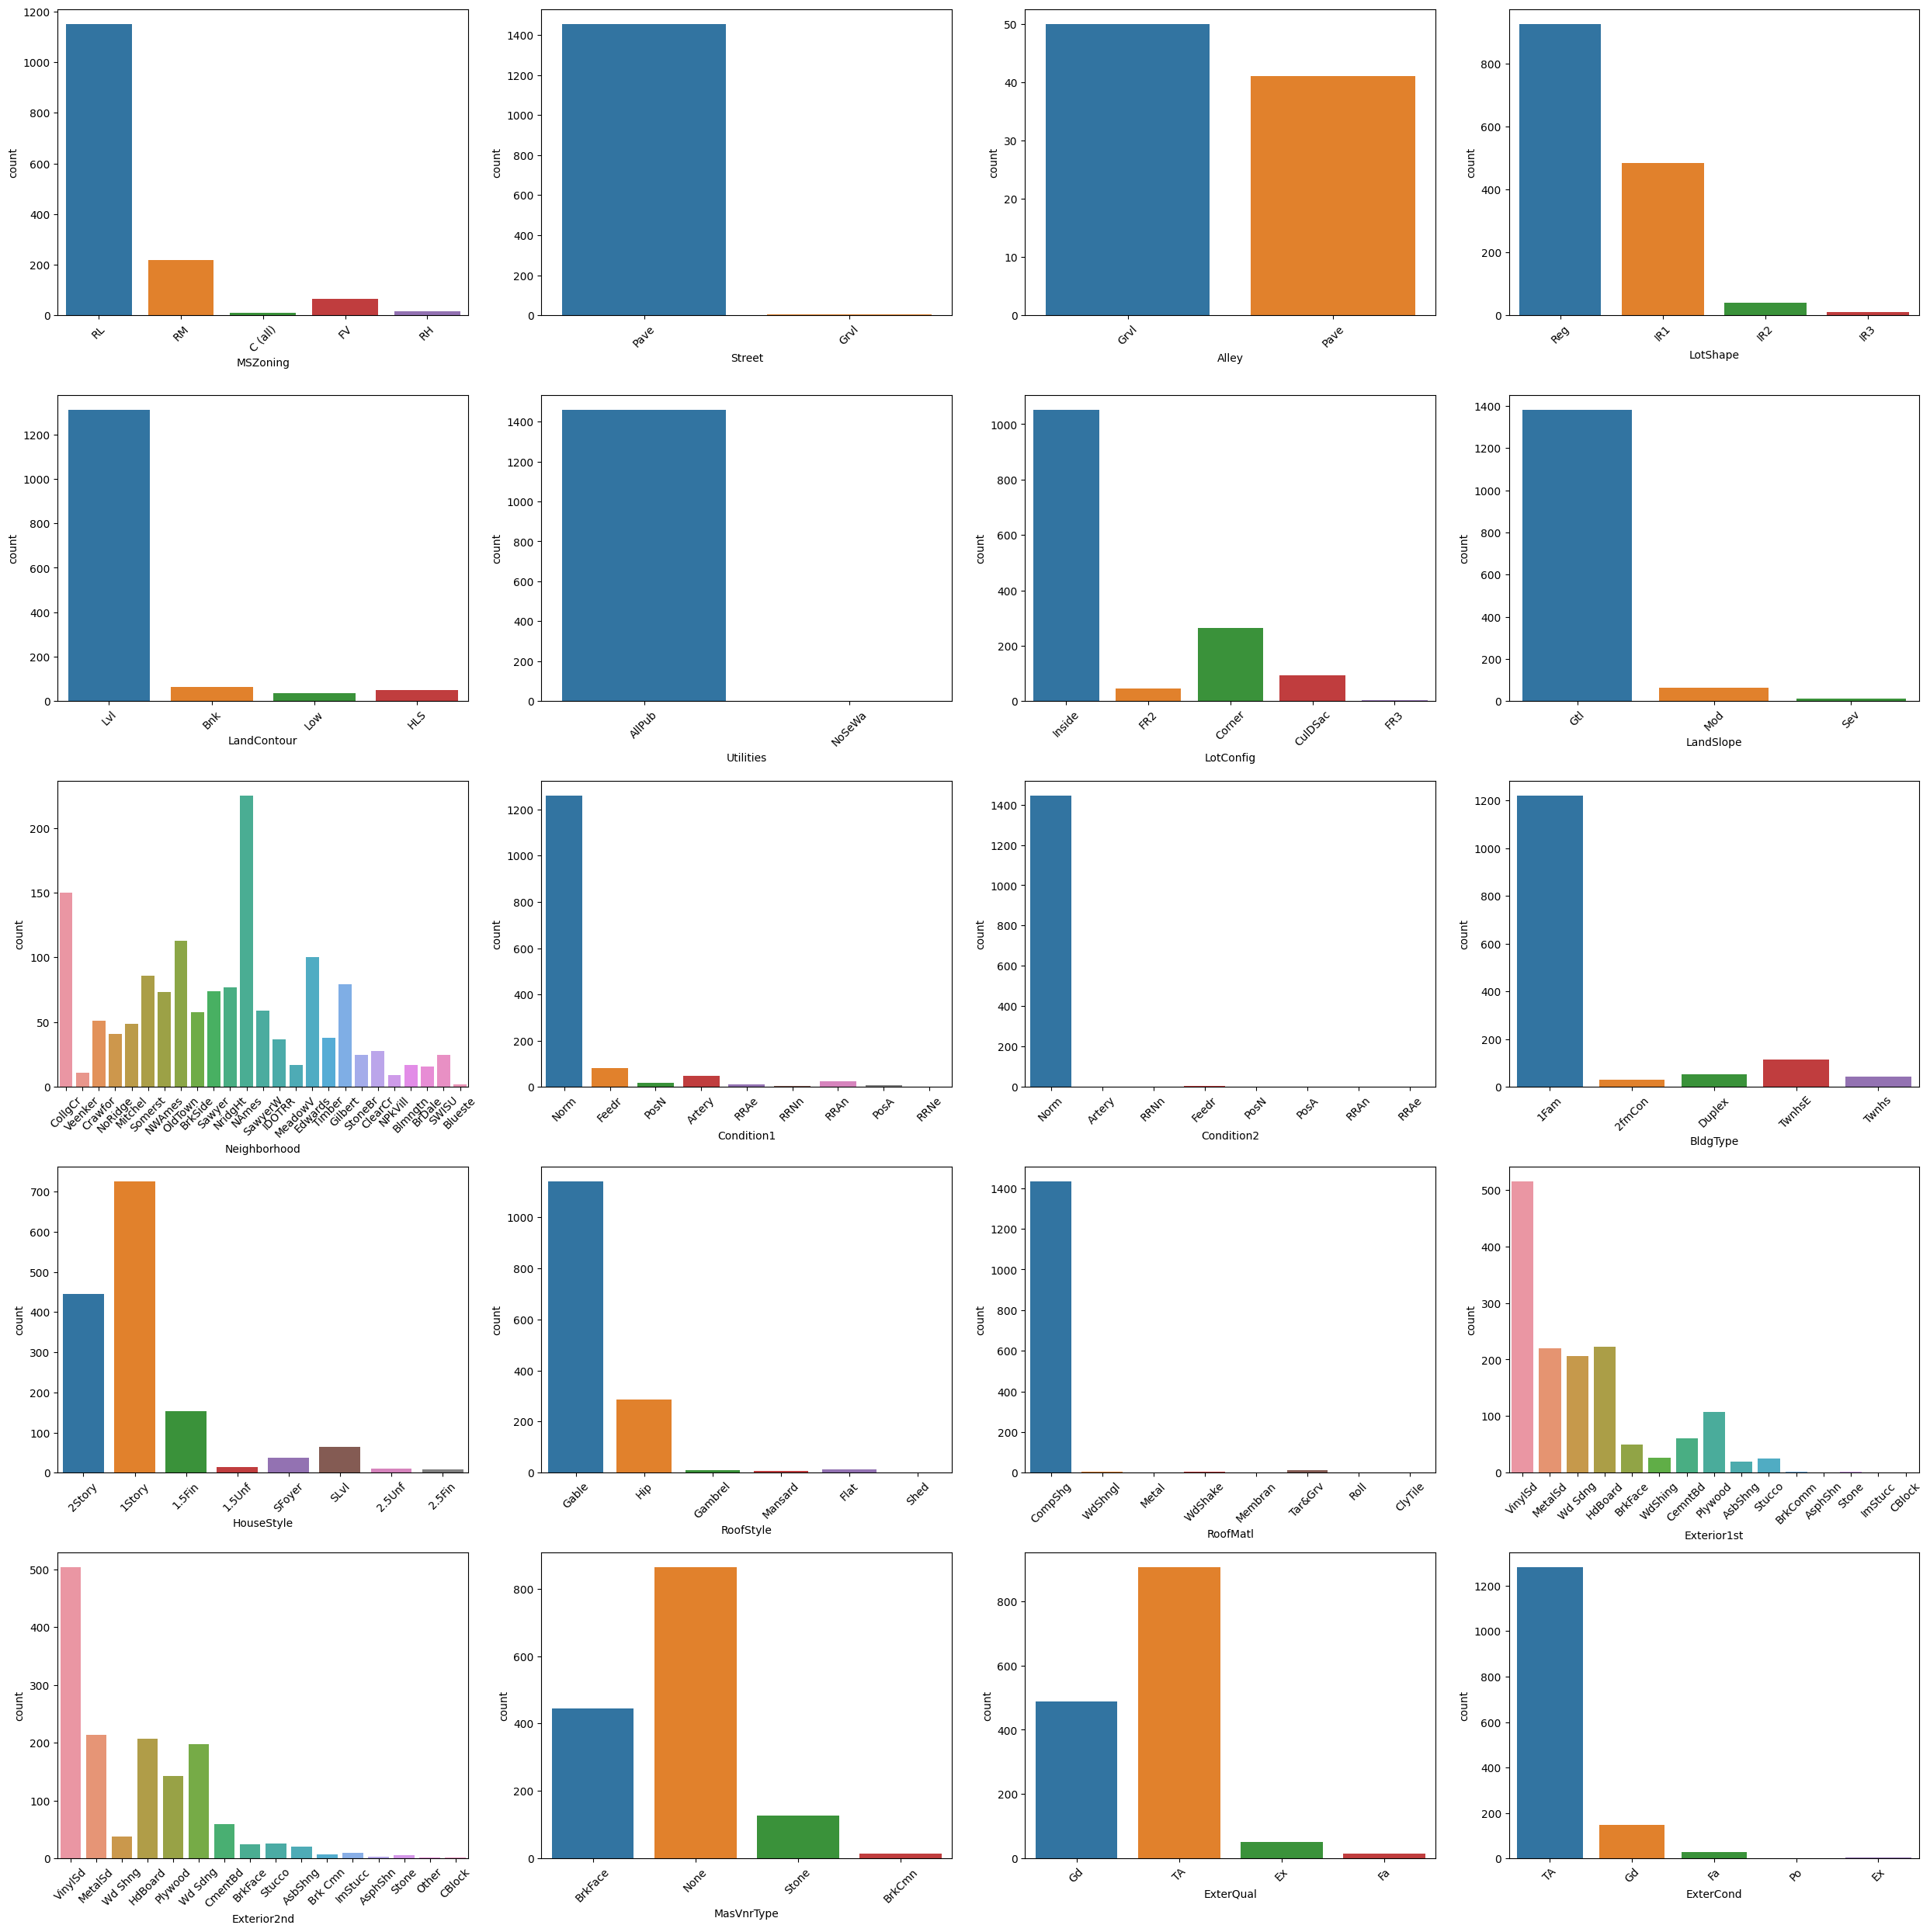

In [15]:
plt.figure(figsize=(25,25))

pl_no=1 #axis number intialized for subplot

for i in cat_data.columns[:20]:
    plt.subplot(5,4,pl_no) #number of subplots for 5x4=20
    sns.countplot(x=i,data=data) #count plot as the data is categorical
    pl_no+=1 
    plt.xticks(rotation=45) #using it for roatation of text in x-axis
    plt.xlabel=i
plt.tight_layout()
    

## Part 2

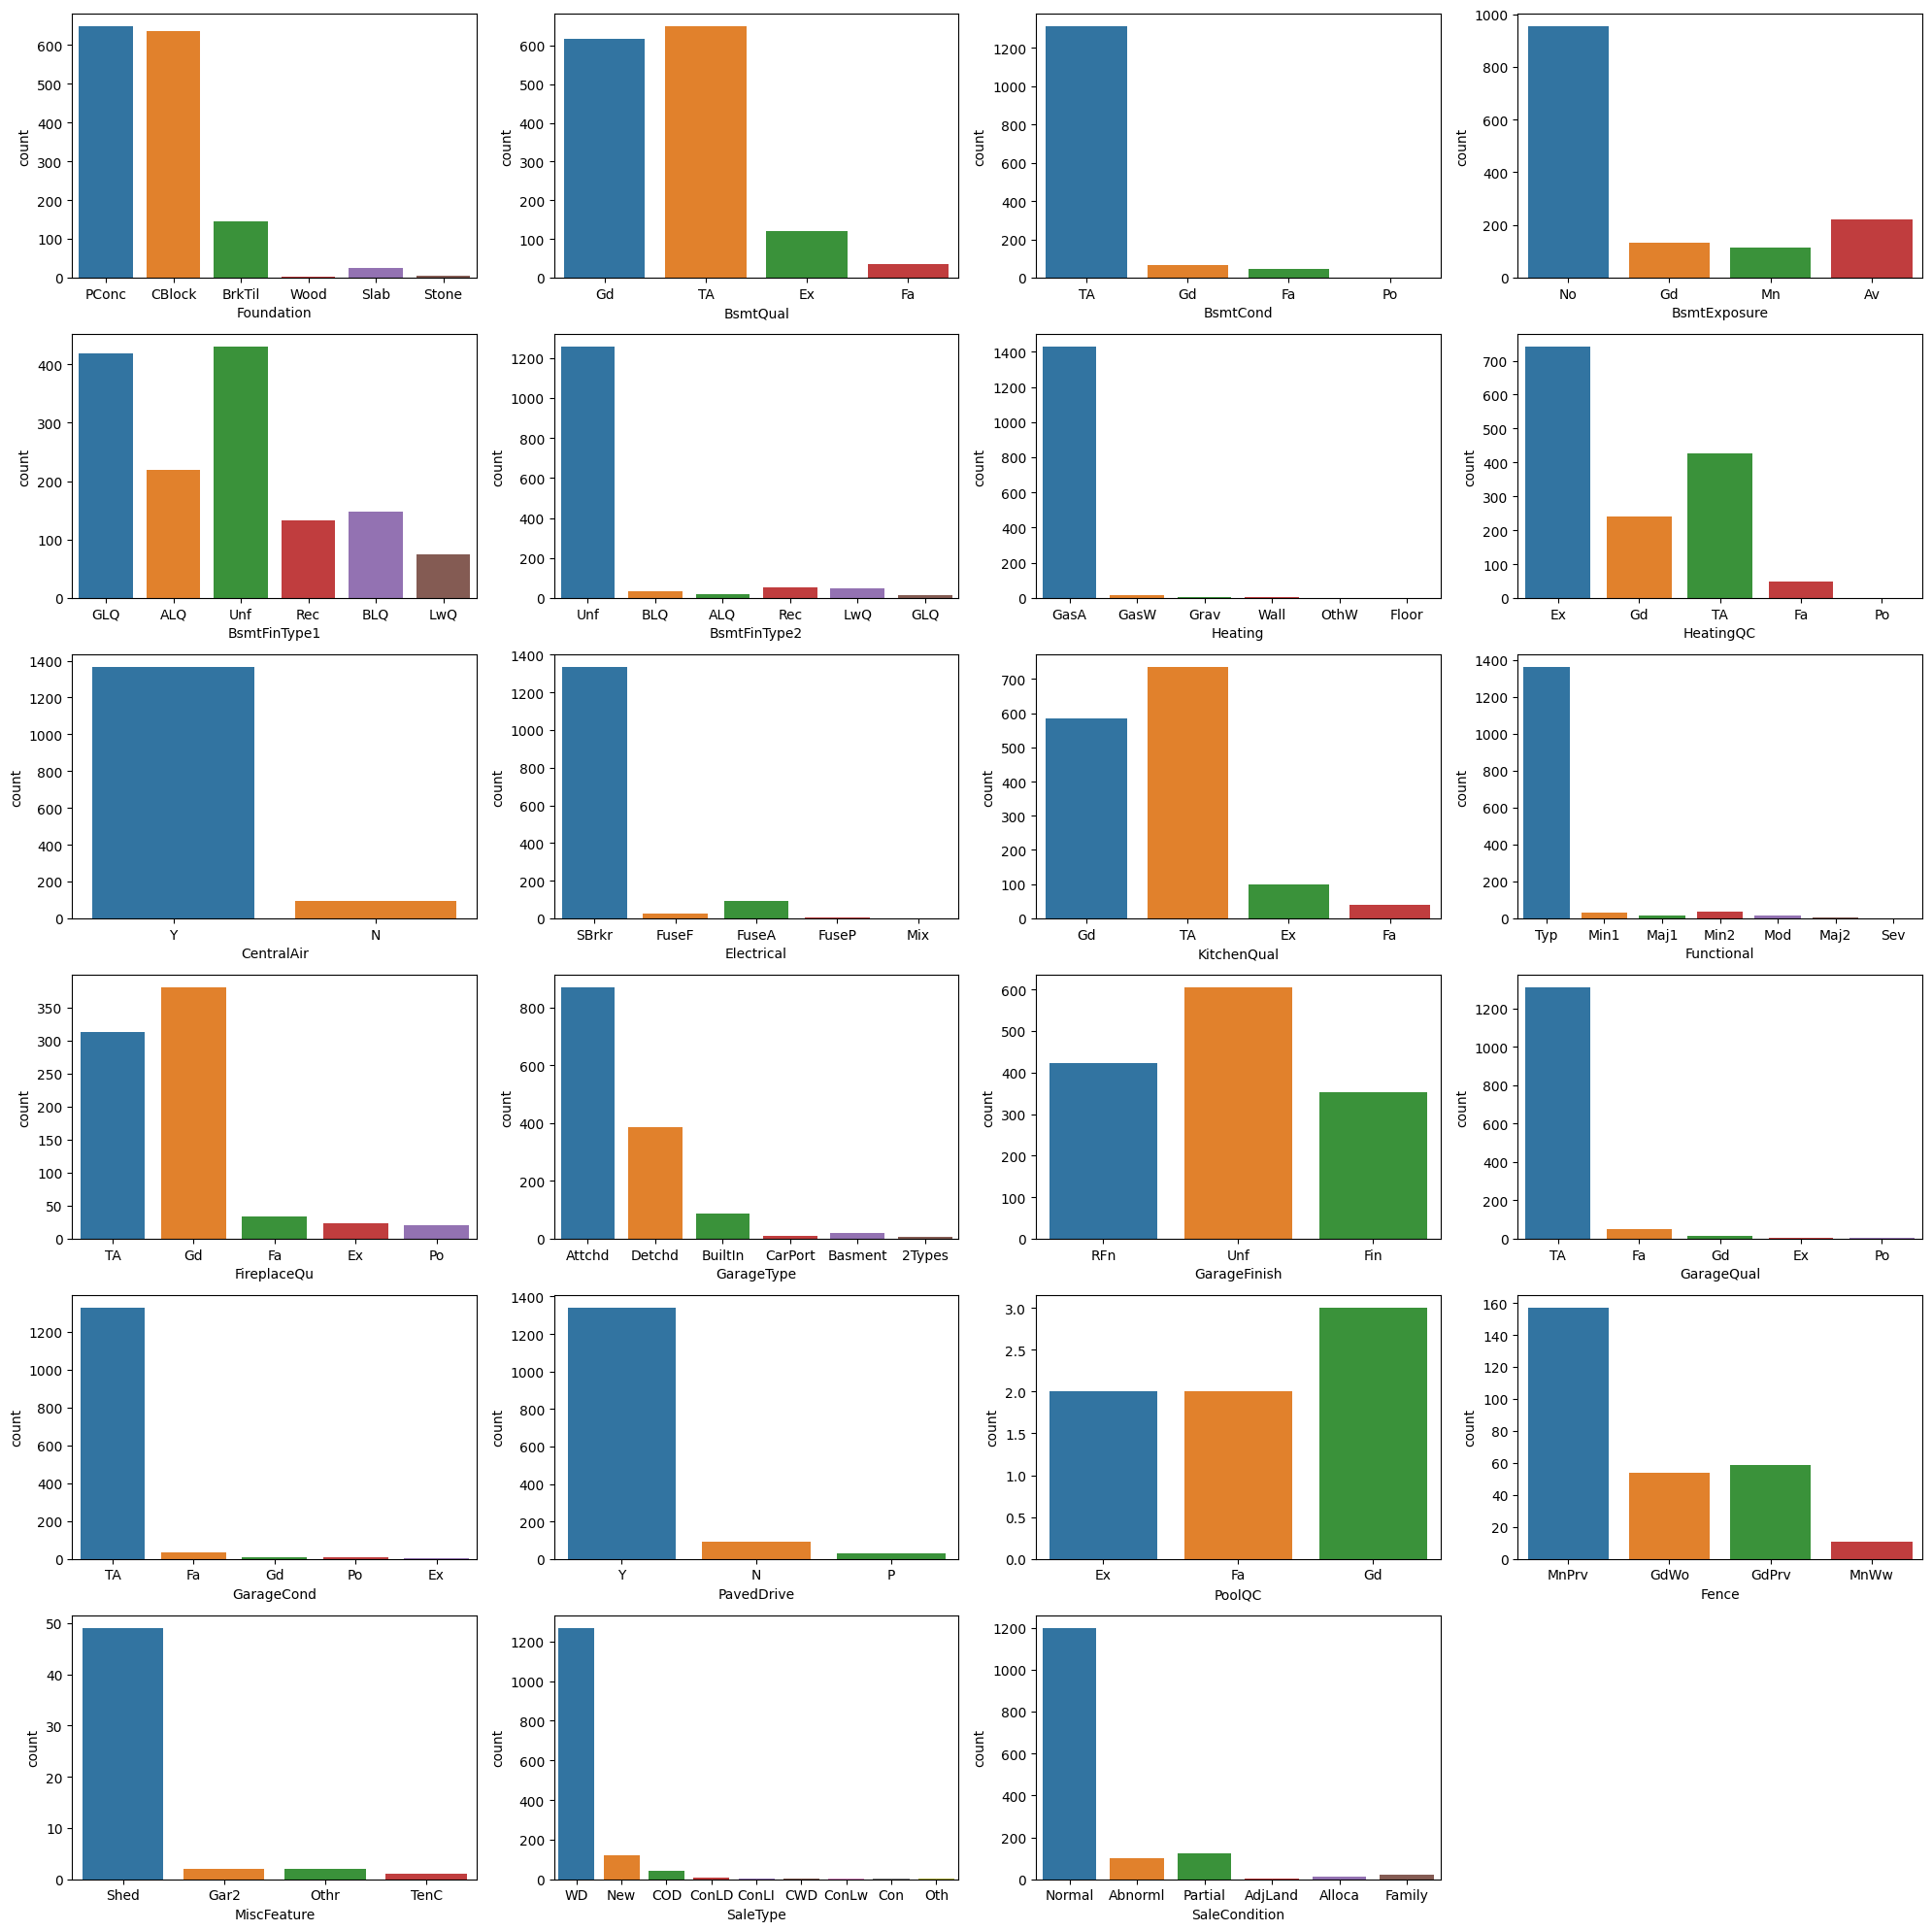

In [16]:
plt.figure(figsize=(20,20))

pl_no=1

for i in cat_data.columns[20:]:
    plt.subplot(6,4,pl_no)
    sns.countplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()
    

# univariant analysys of numerical columns

## part 1

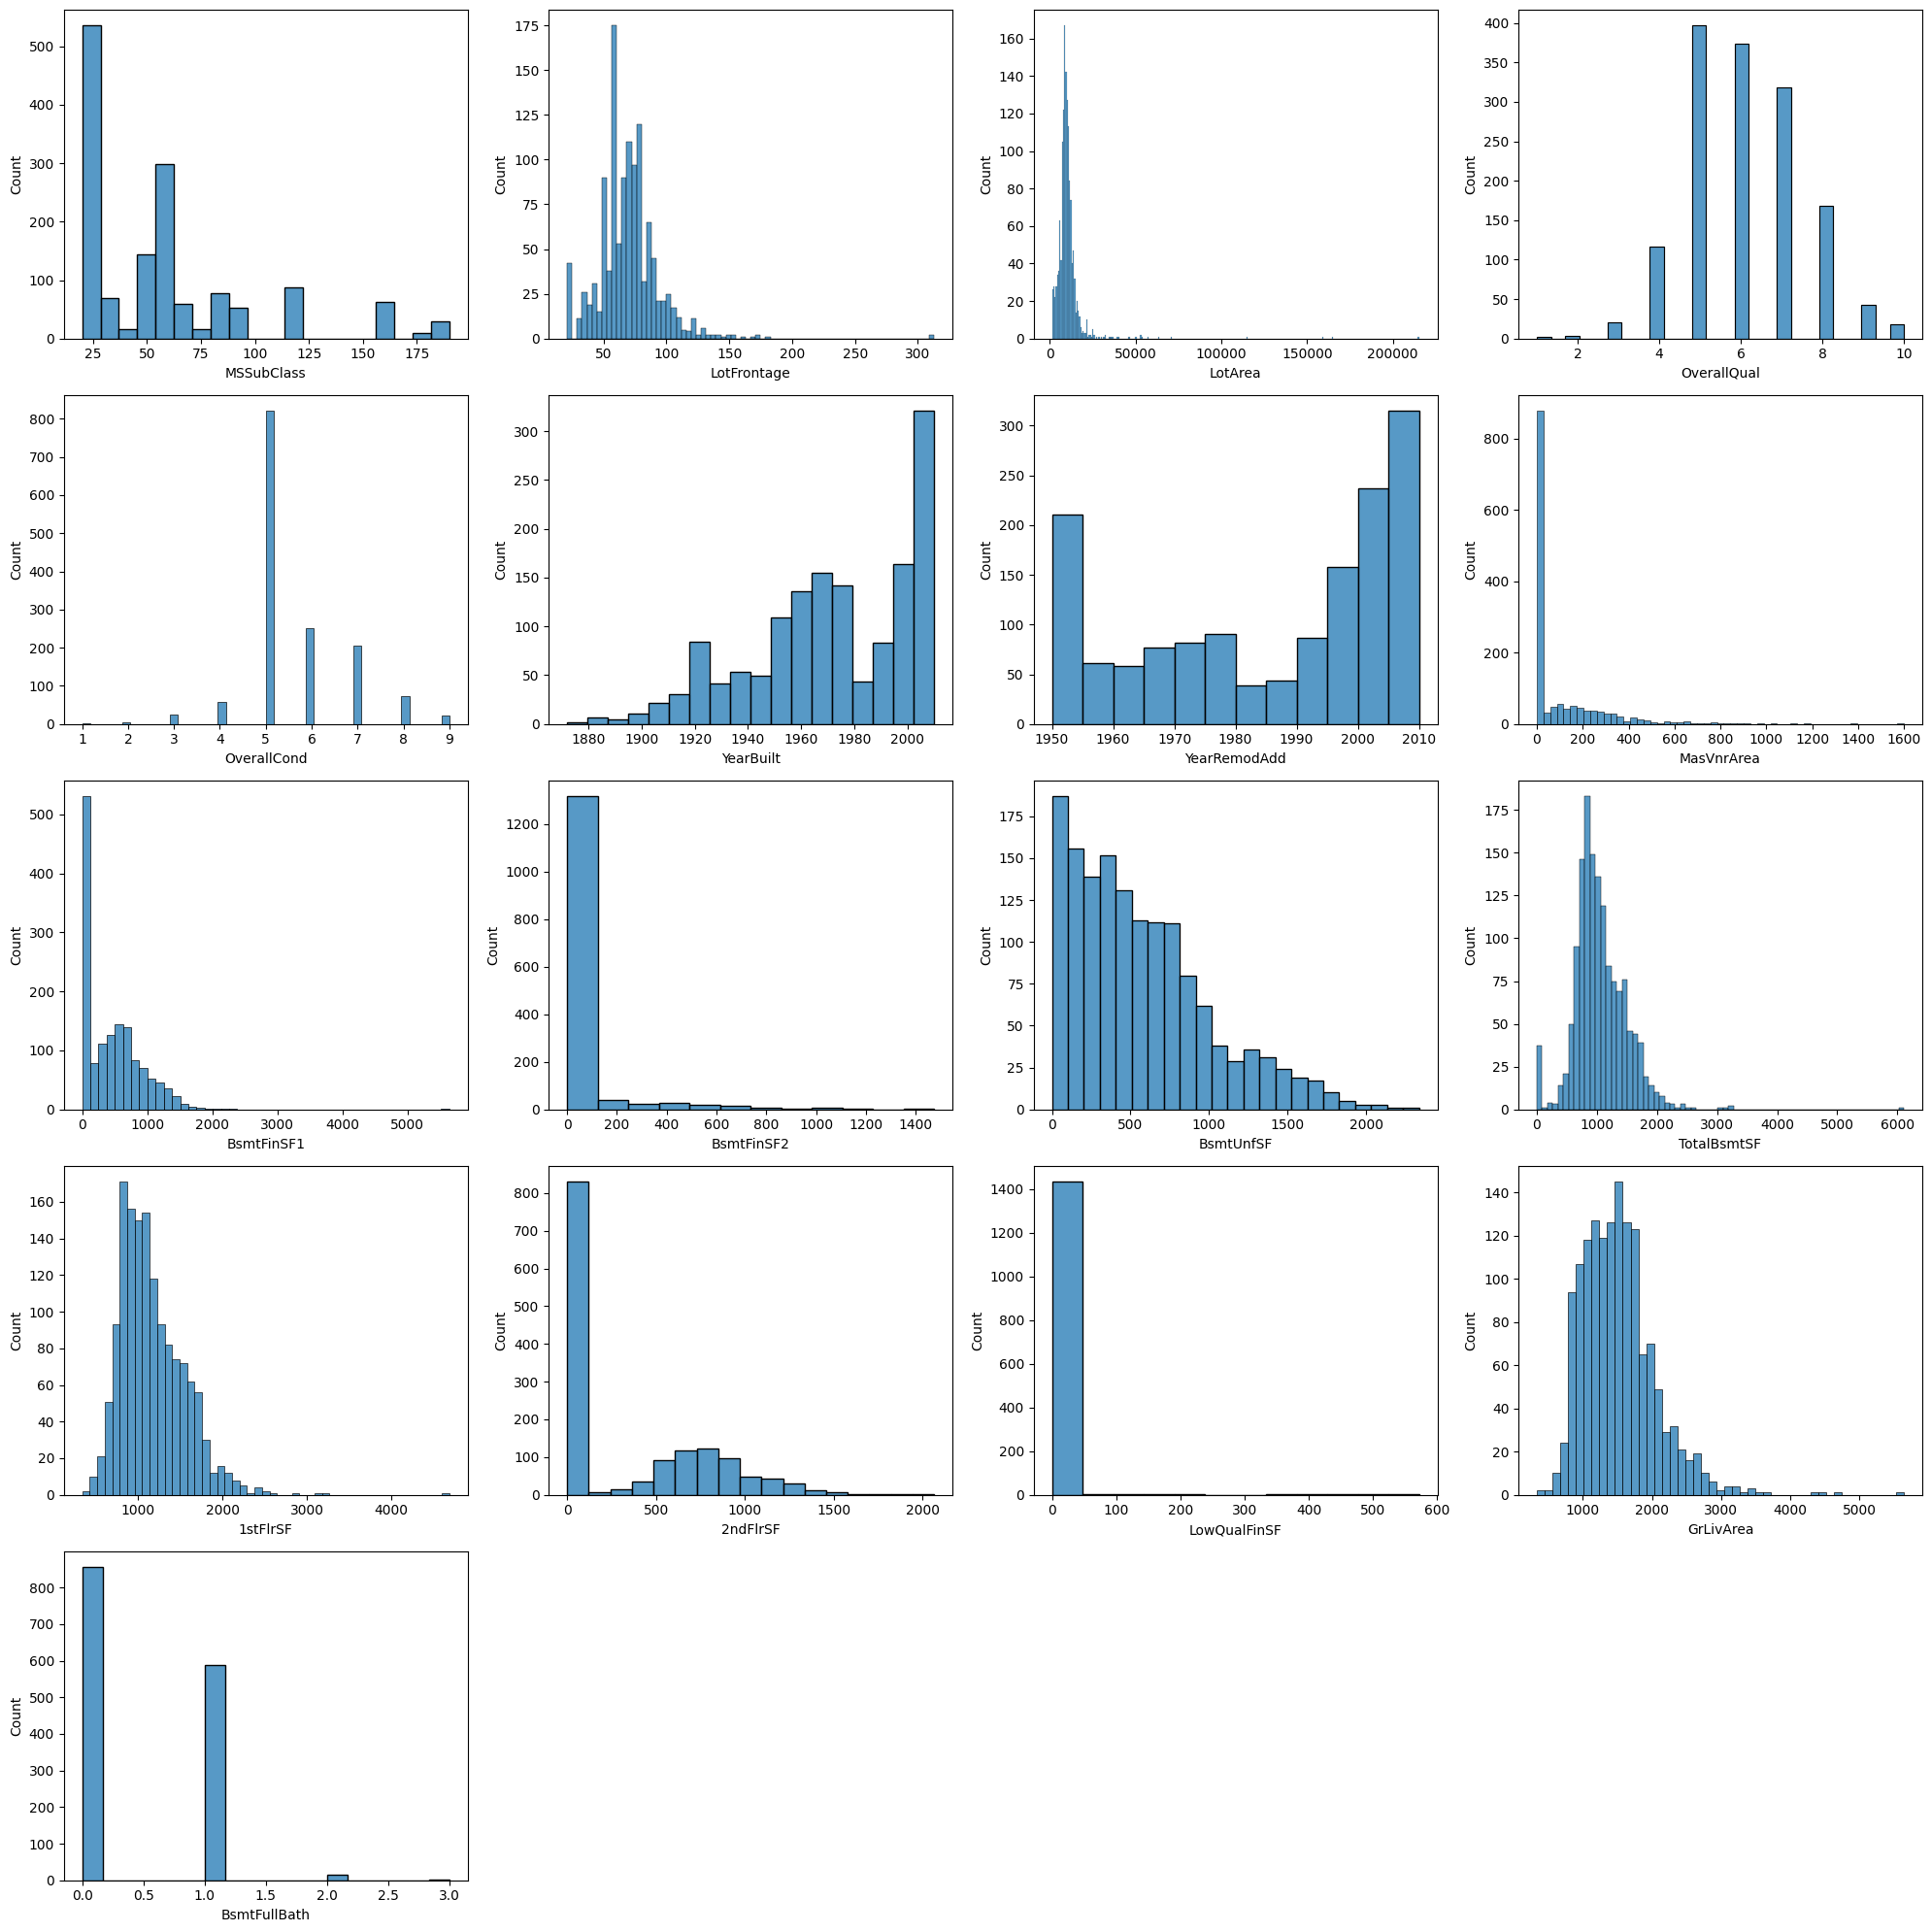

In [17]:
plt.figure(figsize=(20,20))

pl_no=1

for i in numerical_data.columns[1:18]:
    plt.subplot(5,4,pl_no)  
    sns.histplot(x=i,data=data) #histplot as it is numerical data
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()
    

## part 2

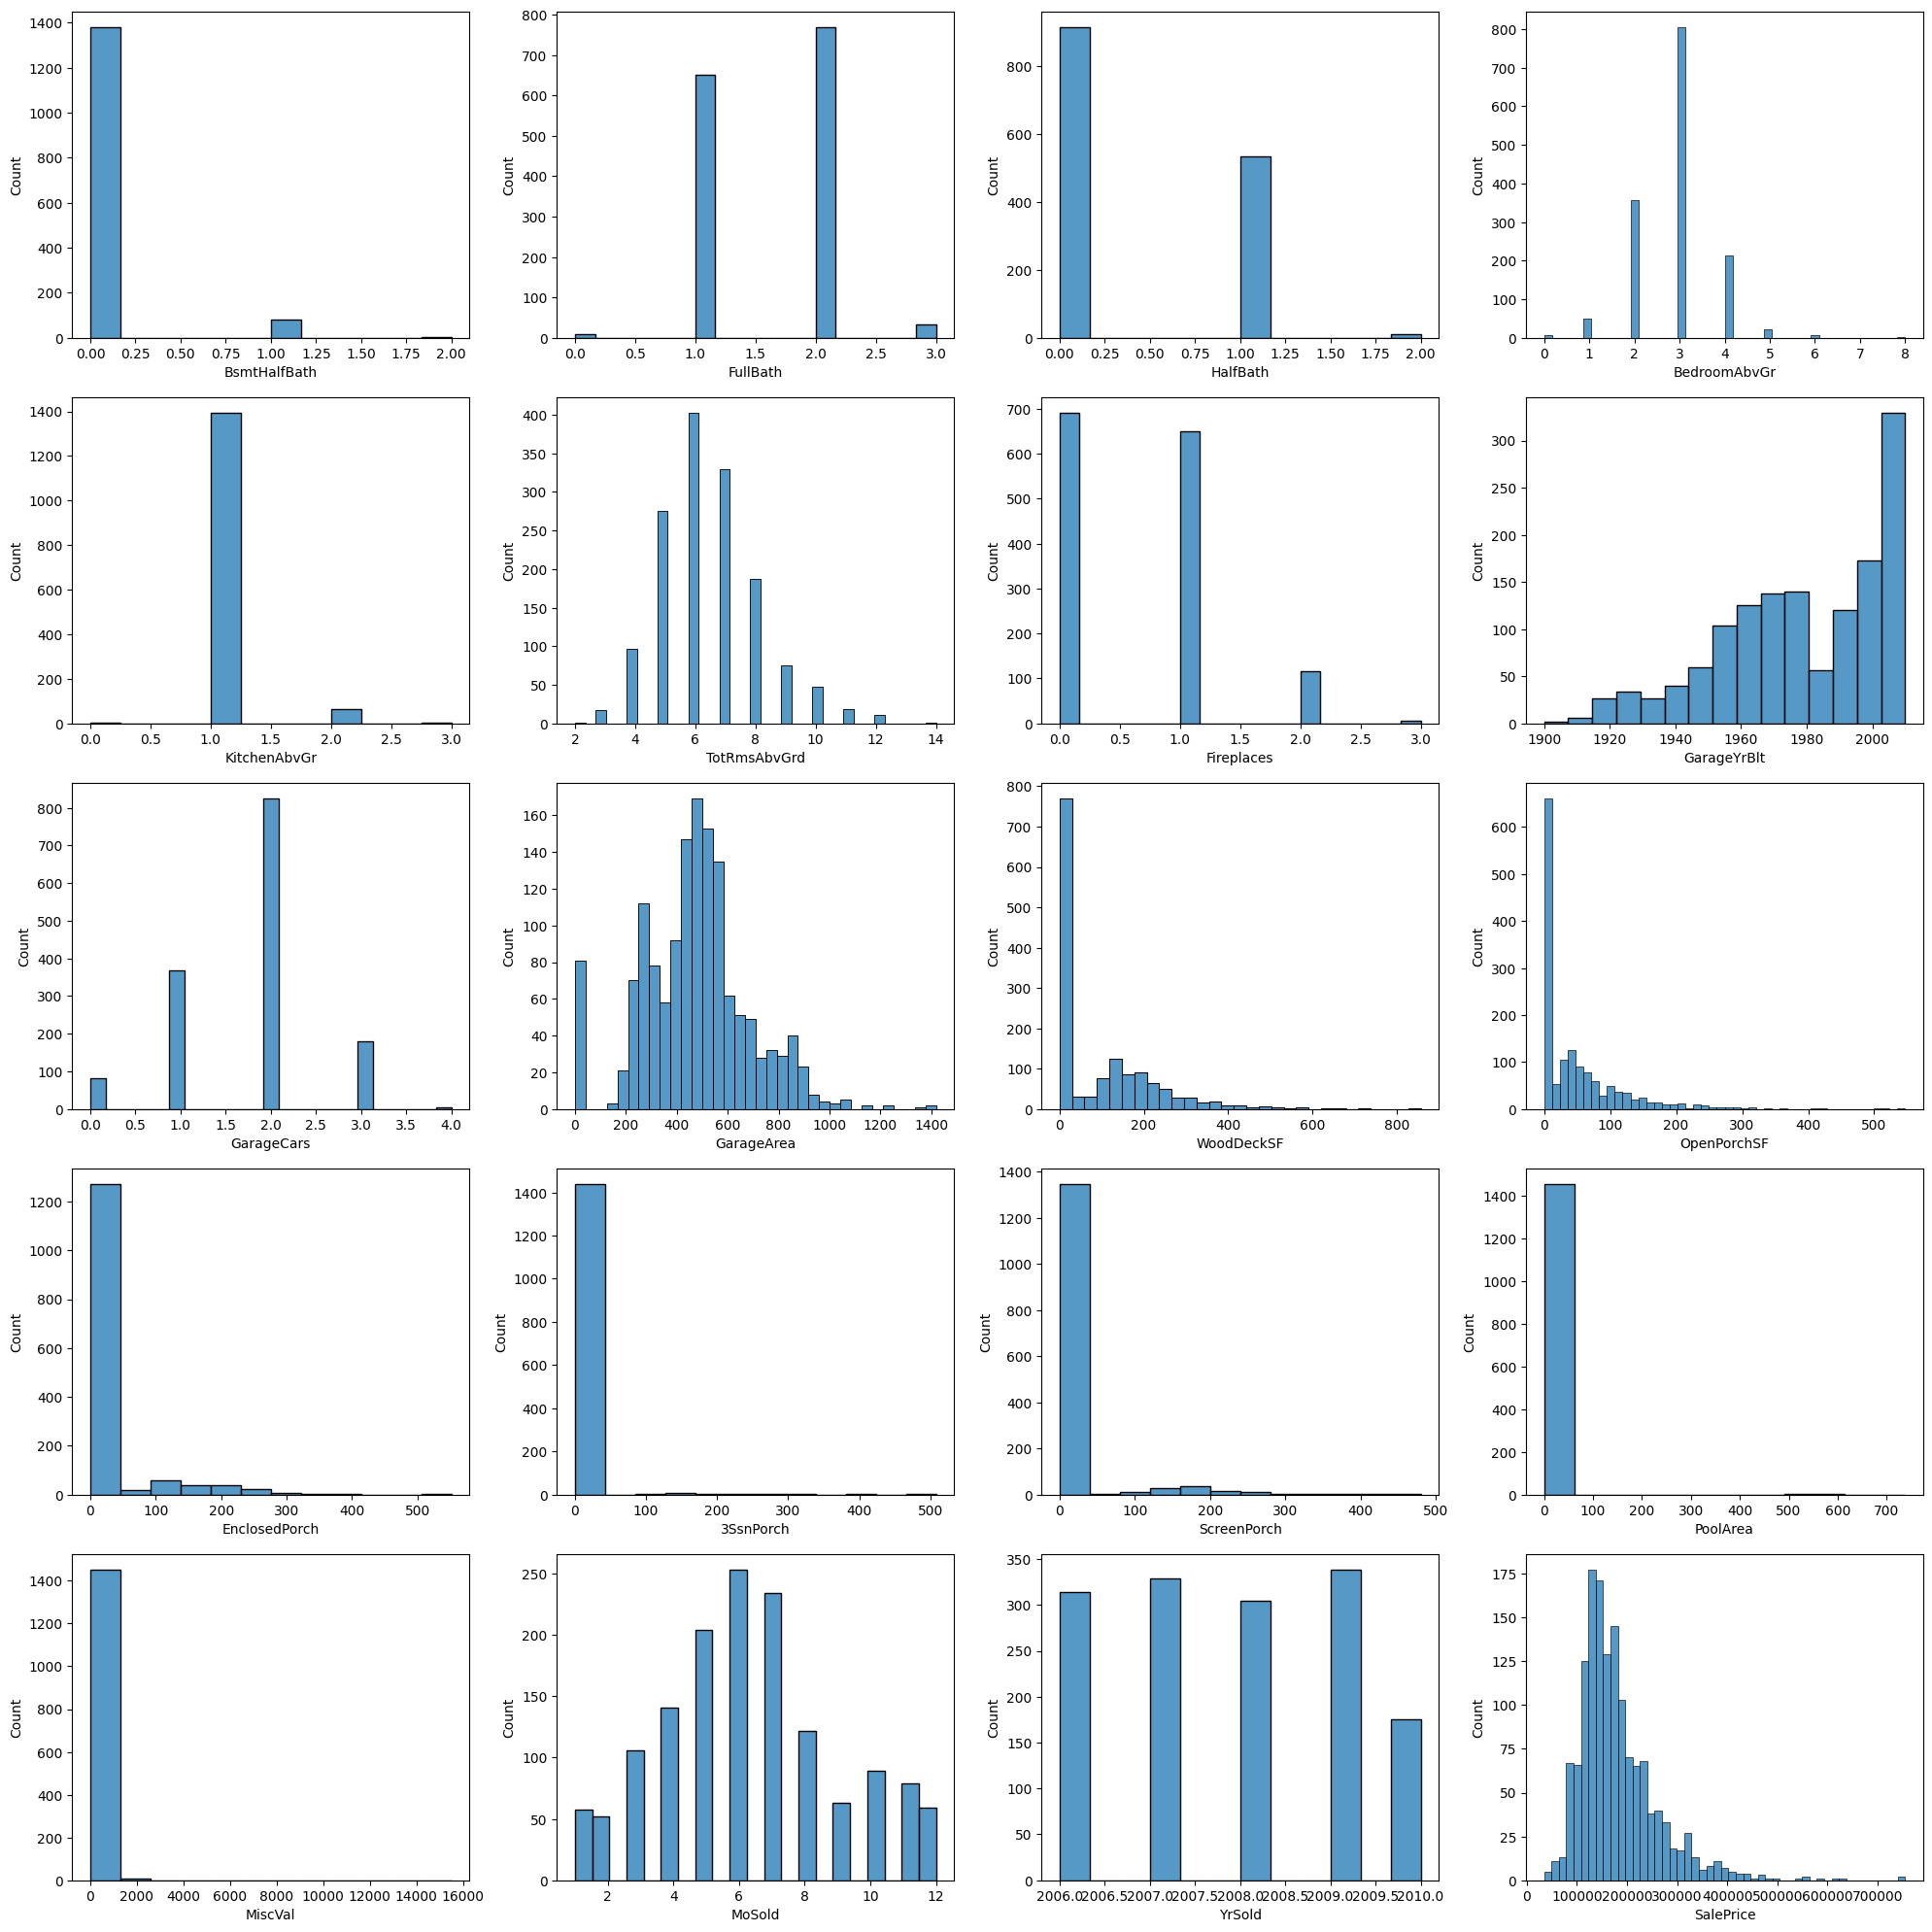

In [18]:
plt.figure(figsize=(20,20))

pl_no=1

for i in numerical_data.columns[18:]:
    plt.subplot(5,4,pl_no)
    sns.histplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()
    

# using sweetviz library

# check for null values

In [19]:
#creating a dictionary for segregating the null values
null_values={'null_count':data.isnull().sum(),'null_percentage':(data.isnull().sum()/len(data))*100,'data_type':data.dtypes}

#creating the dataframe using dictionary defined
null=pd.DataFrame(null_values)

#selecting the null columns which is above 50%
null[null['null_percentage']>50]

null_count  null_percentage data_type
Alley              1369        93.767123    object
PoolQC             1453        99.520548    object
Fence              1179        80.753425    object
MiscFeature        1406        96.301370    object

In [20]:
null

null_count  null_percentage data_type
Id                      0         0.000000     int64
MSSubClass              0         0.000000     int64
MSZoning                0         0.000000    object
LotFrontage           259        17.739726   float64
LotArea                 0         0.000000     int64
...                   ...              ...       ...
MoSold                  0         0.000000     int64
YrSold                  0         0.000000     int64
SaleType                0         0.000000    object
SaleCondition           0         0.000000    object
SalePrice               0         0.000000     int64

[81 rows x 3 columns]

In [21]:
null[null['null_percentage']>50].index  # columns with more than 50% of null values

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [22]:
data.drop(null[null['null_percentage']>50].index,axis=1,inplace=True)  #dropped columns having more than 50% of null values

In [23]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [24]:
null_1=null.drop(null[null['null_percentage']>50].index,axis=0)

In [25]:
null_1

null_count  null_percentage data_type
Id                      0         0.000000     int64
MSSubClass              0         0.000000     int64
MSZoning                0         0.000000    object
LotFrontage           259        17.739726   float64
LotArea                 0         0.000000     int64
...                   ...              ...       ...
MoSold                  0         0.000000     int64
YrSold                  0         0.000000     int64
SaleType                0         0.000000    object
SaleCondition           0         0.000000    object
SalePrice               0         0.000000     int64

[77 rows x 3 columns]

In [26]:
e=null_1[null_1['null_percentage']>0] # selecting the columns with null values more than 0 for imputation
e

null_count  null_percentage data_type
LotFrontage          259        17.739726   float64
MasVnrType             8         0.547945    object
MasVnrArea             8         0.547945   float64
BsmtQual              37         2.534247    object
BsmtCond              37         2.534247    object
BsmtExposure          38         2.602740    object
BsmtFinType1          37         2.534247    object
BsmtFinType2          38         2.602740    object
Electrical             1         0.068493    object
FireplaceQu          690        47.260274    object
GarageType            81         5.547945    object
GarageYrBlt           81         5.547945   float64
GarageFinish          81         5.547945    object
GarageQual            81         5.547945    object
GarageCond            81         5.547945    object

In [27]:
for i in e.index:
    if data[i].dtype!='object':
        print(f'mean of {i} ------> {np.mean(data[i])}') #gives the mean of all numerical data
        print(f'median of {i} -----> {np.median(data[i])}') #gives the median of all the numerical data
        print('===================================')
        
    else:
        print(f'mode of {i} ------> {data[i].mode()[0]}') #gives the mode of categorical data
        print('===================================')

mean of LotFrontage ------> 70.04995836802665
median of LotFrontage -----> nan
mode of MasVnrType ------> None
mean of MasVnrArea ------> 103.68526170798899
median of MasVnrArea -----> nan
mode of BsmtQual ------> TA
mode of BsmtCond ------> TA
mode of BsmtExposure ------> No
mode of BsmtFinType1 ------> Unf
mode of BsmtFinType2 ------> Unf
mode of Electrical ------> SBrkr
mode of FireplaceQu ------> Gd
mode of GarageType ------> Attchd
mean of GarageYrBlt ------> 1978.5061638868744
median of GarageYrBlt -----> nan
mode of GarageFinish ------> Unf
mode of GarageQual ------> TA
mode of GarageCond ------> TA


## null value imputation



*  `mean_imputation` imputed with mean for numerical columns


*  `mode_imputation` imputed with mode for categorical columns

In [28]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].mean()

In [29]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].mean()

In [30]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data['GarageYrBlt'].mean()

In [31]:
for i in e.index:
    if data[i].dtype=='object': #detects the datatypes with object type
        data.loc[data[i].isnull()==True,i]=data[i].mode()[0] #imputes with mode of that category
        
    

In [32]:
pd.set_option('display.max_rows',None)
data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## outlier handling

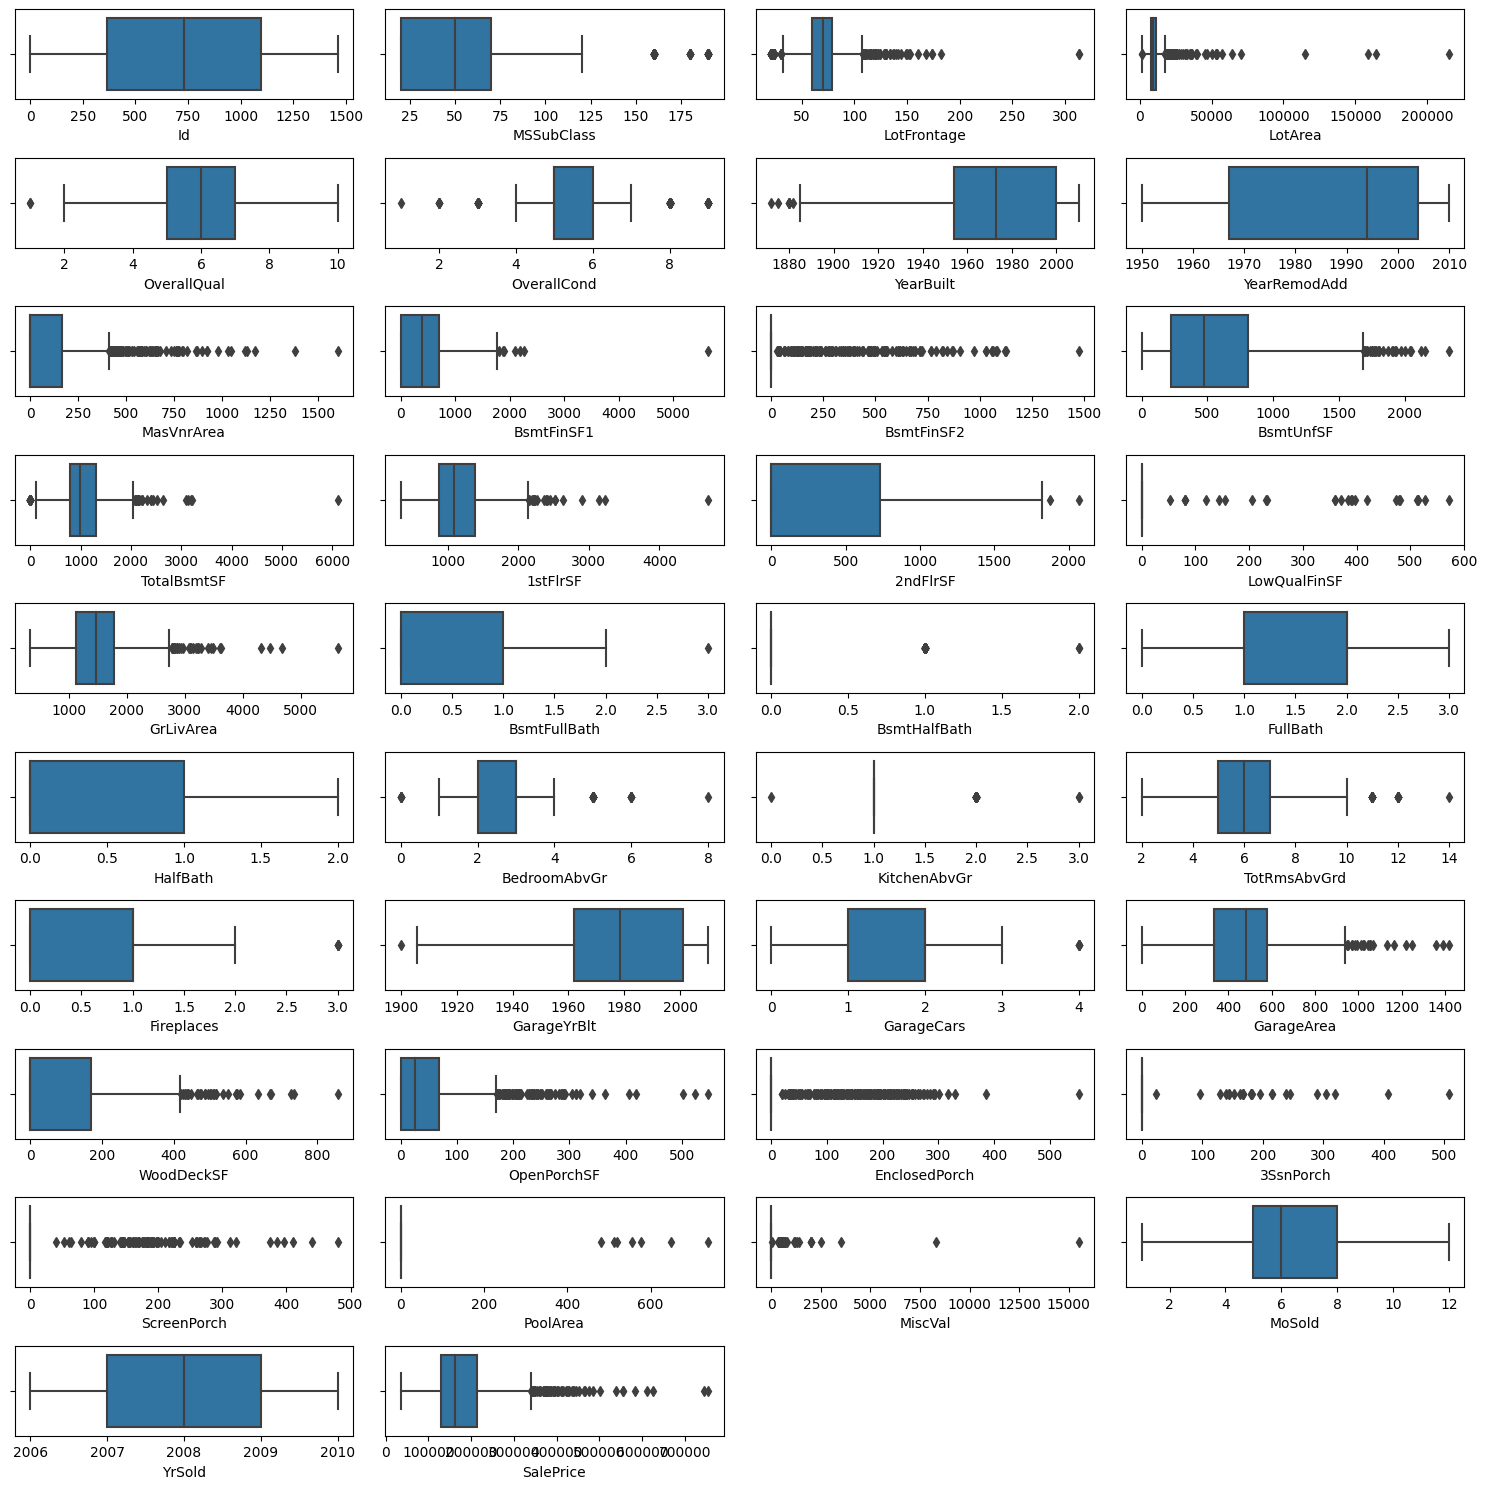

In [33]:
#visualizing the numerical data using the boxplot
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()



*   checked for upper limit and lower limit of columns




In [36]:
#calculating the upper and lower limits of all numerical data
for i in data.columns[1:]:
    if data[i].dtype!='object':
        
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR
        
        print(f'lower limit of {i} ------> {lower_lim}')
        print(f'upper limit of {i} ------> {upper_lim}')
        print('===================================')

        
    

lower limit of MSSubClass ------> -55.0
upper limit of MSSubClass ------> 145.0
lower limit of LotFrontage ------> 31.5
upper limit of LotFrontage ------> 107.5
lower limit of LotArea ------> 1481.5
upper limit of LotArea ------> 17673.5
lower limit of OverallQual ------> 2.0
upper limit of OverallQual ------> 10.0
lower limit of OverallCond ------> 3.5
upper limit of OverallCond ------> 7.5
lower limit of YearBuilt ------> 1885.0
upper limit of YearBuilt ------> 2069.0
lower limit of YearRemodAdd ------> 1911.5
upper limit of YearRemodAdd ------> 2059.5
lower limit of MasVnrArea ------> -246.375
upper limit of MasVnrArea ------> 410.625
lower limit of BsmtFinSF1 ------> -1068.375
upper limit of BsmtFinSF1 ------> 1780.625
lower limit of BsmtFinSF2 ------> 0.0
upper limit of BsmtFinSF2 ------> 0.0
lower limit of BsmtUnfSF ------> -654.5
upper limit of BsmtUnfSF ------> 1685.5
lower limit of TotalBsmtSF ------> 42.0
upper limit of TotalBsmtSF ------> 2052.0
lower limit of 1stFlrSF -----



*   found the number of rows missing with outliers range



In [37]:
#calcualting the number of lost rows if we use upper and lower limits
for i in data.columns[1:]:
  if data[i].dtype!='object':

        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR

        out_data=data.loc[(data[i]>lower_lim) & (data[i]<upper_lim)]

        print(f'no of rows lost in {i} ------> {len(data)-len(out_data)}')


no of rows lost in MSSubClass ------> 103
no of rows lost in LotFrontage ------> 106
no of rows lost in LotArea ------> 69
no of rows lost in OverallQual ------> 23
no of rows lost in OverallCond ------> 125
no of rows lost in YearBuilt ------> 9
no of rows lost in YearRemodAdd ------> 0
no of rows lost in MasVnrArea ------> 98
no of rows lost in BsmtFinSF1 ------> 7
no of rows lost in BsmtFinSF2 ------> 1460
no of rows lost in BsmtUnfSF ------> 29
no of rows lost in TotalBsmtSF ------> 61
no of rows lost in 1stFlrSF ------> 20
no of rows lost in 2ndFlrSF ------> 2
no of rows lost in LowQualFinSF ------> 1460
no of rows lost in GrLivArea ------> 31
no of rows lost in BsmtFullBath ------> 1
no of rows lost in BsmtHalfBath ------> 1460
no of rows lost in FullBath ------> 0
no of rows lost in HalfBath ------> 0
no of rows lost in BedroomAbvGr ------> 35
no of rows lost in KitchenAbvGr ------> 1460
no of rows lost in TotRmsAbvGrd ------> 78
no of rows lost in Fireplaces ------> 5
no of row

In [38]:
f=[]
for i in data.columns[1:]:
  if data[i].dtype!='object':

        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR

        out_df1=data.loc[(data[i]>lower_lim) & (data[i]<upper_lim)]

        lngt=len(data)-len(out_df1)

        f.append(lngt)

        


In [39]:
len(f)

37

In [40]:
outlier_data=pd.DataFrame({'column_names':numerical_cols[1:],'outlier_count':f})

In [41]:
outlier_data.head()

column_names  outlier_count
0   MSSubClass            103
1  LotFrontage            106
2      LotArea             69
3  OverallQual             23
4  OverallCond            125

In [42]:
outlier_data['per_oulier']=100*(outlier_data['outlier_count']/len(data))

In [43]:
outlier_data

column_names  outlier_count  per_oulier
0      MSSubClass            103    7.054795
1     LotFrontage            106    7.260274
2         LotArea             69    4.726027
3     OverallQual             23    1.575342
4     OverallCond            125    8.561644
5       YearBuilt              9    0.616438
6    YearRemodAdd              0    0.000000
7      MasVnrArea             98    6.712329
8      BsmtFinSF1              7    0.479452
9      BsmtFinSF2           1460  100.000000
10      BsmtUnfSF             29    1.986301
11    TotalBsmtSF             61    4.178082
12       1stFlrSF             20    1.369863
13       2ndFlrSF              2    0.136986
14   LowQualFinSF           1460  100.000000
15      GrLivArea             31    2.123288
16   BsmtFullBath              1    0.068493
17   BsmtHalfBath           1460  100.000000
18       FullBath              0    0.000000
19       HalfBath              0    0.000000
20   BedroomAbvGr             35    2.397260
21   KitchenAbvGr           1460  100.000000
22   TotRmsAbvGrd             78    5.342466
23     Fireplaces              5    0.342466
24    GarageYrBlt              1    0.068493
25     GarageCars              5    0.342466
26     GarageArea             21    1.438356
27     WoodDeckSF             32    2.191781
28    OpenPorchSF             79    5.410959
29  EnclosedPorch           1460  100.000000
30      3SsnPorch           1460  100.000000
31    ScreenPorch           1460  100.000000
32       PoolArea           1460  100.000000
33        MiscVal           1460  100.000000
34         MoSold              0    0.000000
35         YrSold              0    0.000000
36      SalePrice             61    4.178082

In [44]:
data.drop(outlier_data[outlier_data['per_oulier']==100]['column_names'],axis=1,inplace=True)


In [45]:
data.shape

(1460, 68)

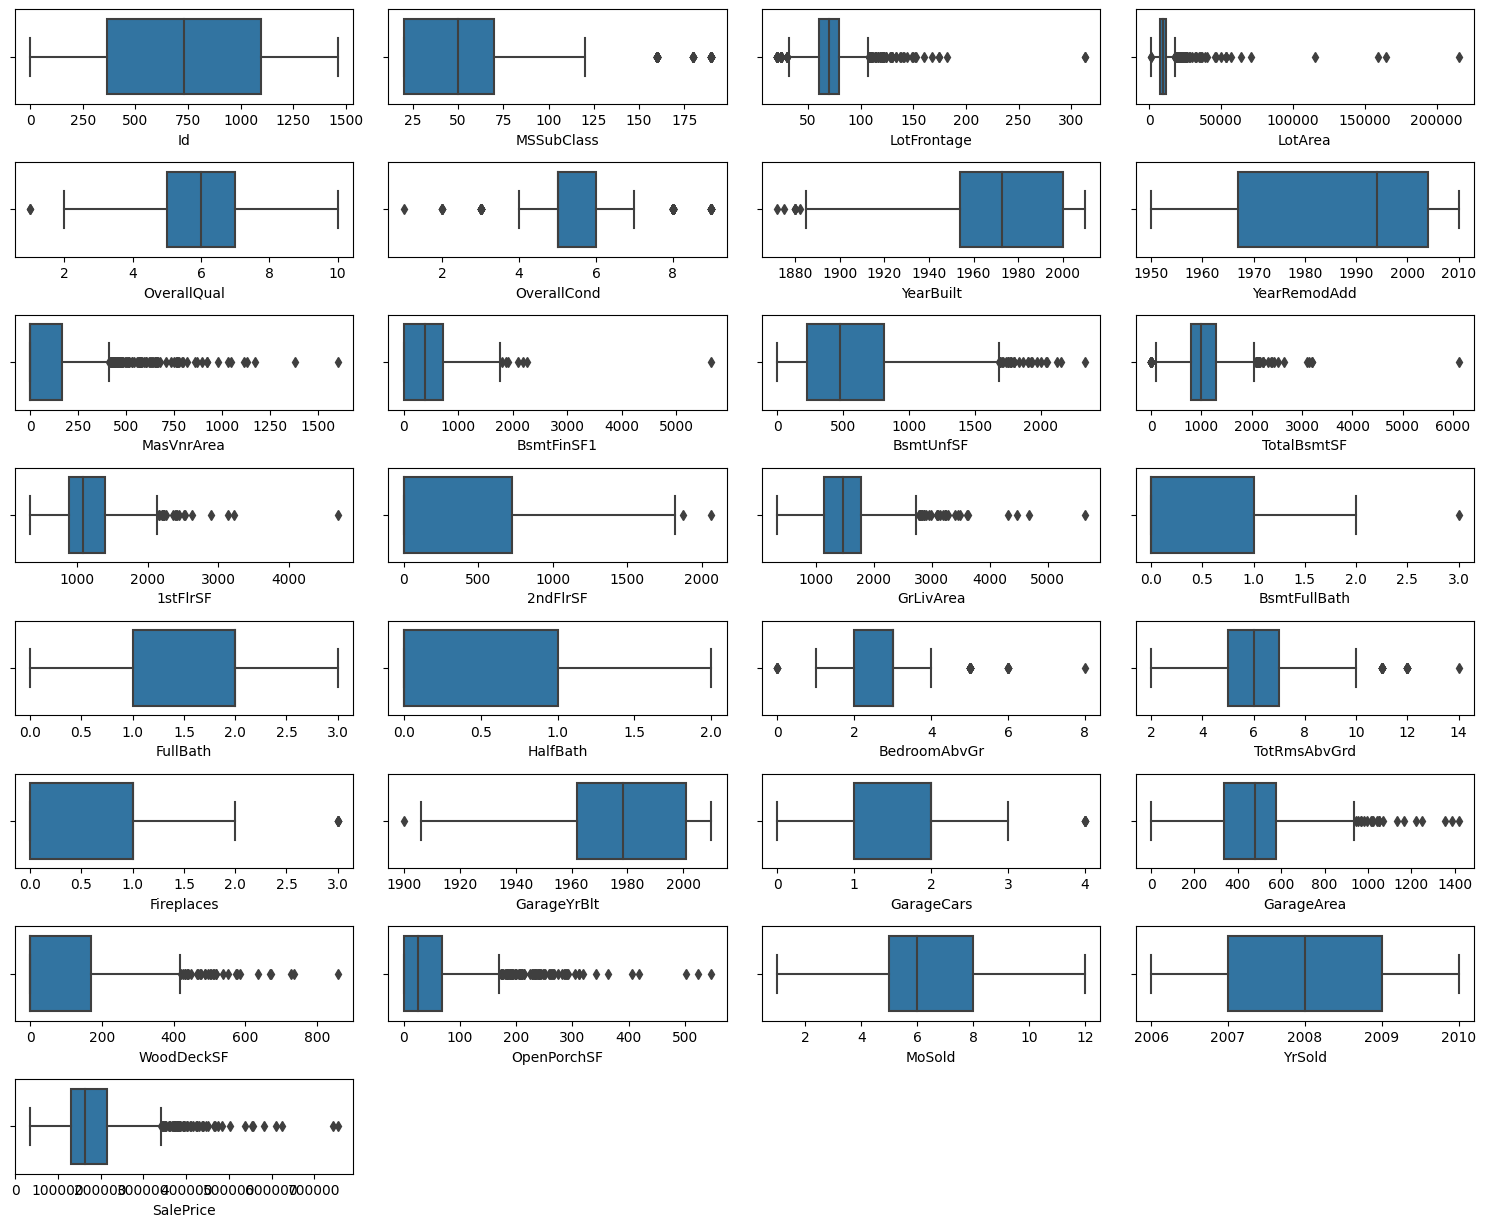

In [46]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

In [47]:
outlier_data.loc[(outlier_data['per_oulier']>0) & (outlier_data['per_oulier']<100)]

column_names  outlier_count  per_oulier
0     MSSubClass            103    7.054795
1    LotFrontage            106    7.260274
2        LotArea             69    4.726027
3    OverallQual             23    1.575342
4    OverallCond            125    8.561644
5      YearBuilt              9    0.616438
7     MasVnrArea             98    6.712329
8     BsmtFinSF1              7    0.479452
10     BsmtUnfSF             29    1.986301
11   TotalBsmtSF             61    4.178082
12      1stFlrSF             20    1.369863
13      2ndFlrSF              2    0.136986
15     GrLivArea             31    2.123288
16  BsmtFullBath              1    0.068493
20  BedroomAbvGr             35    2.397260
22  TotRmsAbvGrd             78    5.342466
23    Fireplaces              5    0.342466
24   GarageYrBlt              1    0.068493
25    GarageCars              5    0.342466
26    GarageArea             21    1.438356
27    WoodDeckSF             32    2.191781
28   OpenPorchSF             79    5.410959
36     SalePrice             61    4.178082

In [48]:
data.shape

(1460, 68)

#outlier elimination



*   ``eliminating the outliers`` manually by choosing the limits manually after visualizing the boxplots



In [49]:
print(len(data.loc[data['MSSubClass']>145]))
data.loc[data['MSSubClass']>145]

103


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
9       10         190       RL    50.000000     7420   Pave      Reg   
48      49         190       RM    33.000000     4456   Pave      Reg   
56      57         160       FV    24.000000     2645   Pave      Reg   
75      76         180       RM    21.000000     1596   Pave      Reg   
87      88         160       FV    40.000000     3951   Pave      Reg   
93      94         190  C (all)    60.000000     7200   Pave      Reg   
115    116         160       FV    34.000000     3230   Pave      Reg   
125    126         190       RM    60.000000     6780   Pave      Reg   
145    146         160       RM    24.000000     2522   Pave      Reg   
165    166         190       RL    62.000000    10106   Pave      Reg   
172    173         160       RL    44.000000     5306   Pave      IR1   
180    181         160       FV    70.049958     2117   Pave      Reg   
193    194         160       RM    24.000000     2522   Pave      Reg   
195    196         160       RL    24.000000     2280   Pave      Reg   
225    226         160       RM    21.000000     1680   Pave      Reg   
227    228         160       RM    21.000000     1869   Pave      Reg   
232    233         160       RM    21.000000     1680   Pave      Reg   
235    236         160       RM    21.000000     1680   Pave      Reg   
243    244         160       RL    75.000000    10762   Pave      Reg   
246    247         190       RM    69.000000     9142   Pave      Reg   
285    286         160       FV    35.000000     4251   Pave      IR1   
291    292         190       RL    55.000000     5687   Pave      Reg   
300    301         190       RL    90.000000    15750   Pave      Reg   
312    313         190       RM    65.000000     7800   Pave      Reg   
335    336         190       RL    70.049958   164660   Grvl      IR1   
344    345         160       RM    36.000000     2592   Pave      Reg   
348    349         160       RL    36.000000     2448   Pave      Reg   
363    364         160       RM    21.000000     1680   Pave      Reg   
411    412         190       RL   100.000000    34650   Pave      Reg   
430    431         160       RM    21.000000     1680   Pave      Reg   
432    433         160       RM    24.000000     1920   Pave      Reg   
434    435         180       RM    21.000000     1890   Pave      Reg   
472    473         180       RM    35.000000     3675   Pave      Reg   
488    489         190       RL    60.000000    10800   Pave      Reg   
489    490         180       RM    21.000000     1526   Pave      Reg   
490    491         160       RM    70.049958     2665   Pave      Reg   
500    501         160       RM    21.000000     1890   Pave      Reg   
504    505         160       RL    24.000000     2308   Pave      Reg   
520    521         190       RL    60.000000    10800   Pave      Reg   
535    536         190       RL    70.000000     7000   Pave      Reg   
578    579         160       FV    34.000000     3604   Pave      Reg   
599    600         160       RM    24.000000     1950   Pave      Reg   
603    604         160       FV    30.000000     3182   Pave      Reg   
614    615         180       RM    21.000000     1491   Pave      Reg   
623    624         160       FV    70.049958     2117   Pave      Reg   
635    636         190       RH    60.000000    10896   Pave      Reg   
637    638         190       RM    50.000000     6000   Pave      Reg   
649    650         180       RM    21.000000     1936   Pave      Reg   
655    656         160       RM    21.000000     1680   Pave      Reg   
675    676         160       RL    24.000000     2289   Pave      Reg   
685    686         160       RL    70.049958     5062   Pave      IR1   
687    688         160       FV    70.049958     5105   Pave      IR2   
703    704         190       RM    76.000000     7630   Pave      Reg   
705    706         190       RM    70.000000     5600   Pave      

In [50]:
# data.loc[data['MSSubClass']>145].index

In [51]:
data.drop(data.loc[data['MSSubClass']>145].index,inplace=True)

In [52]:
data.shape

(1357, 68)

In [53]:
print(len(data.loc[data['LotFrontage']>100]))
data.loc[data['LotFrontage']>100]

83


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
20      21          60       RL        101.0    14215   Pave      IR1   
25      26          20       RL        110.0    14230   Pave      Reg   
35      36          60       RL        108.0    13418   Pave      Reg   
36      37          20       RL        112.0    10859   Pave      Reg   
41      42          20       RL        115.0    16905   Pave      Reg   
52      53          90       RM        110.0     8472   Grvl      IR2   
85      86          60       RL        121.0    16059   Pave      Reg   
86      87          60       RL        122.0    11911   Pave      IR2   
88      89          50  C (all)        105.0     8470   Pave      IR1   
109    110          20       RL        105.0    11751   Pave      IR1   
150    151          20       RL        120.0    10356   Pave      Reg   
151    152          20       RL        107.0    13891   Pave      Reg   
159    160          60       RL        134.0    19378   Pave      IR1   
161    162          60       RL        110.0    13688   Pave      IR1   
171    172          20       RL        141.0    31770   Pave      IR1   
197    198          75       RL        174.0    25419   Pave      Reg   
224    225          20       RL        103.0    13472   Pave      Reg   
231    232          60       RL        174.0    15138   Pave      IR1   
260    261          80       RL        120.0    19296   Pave      Reg   
276    277          20       RL        129.0     9196   Pave      IR1   
277    278          20       RL        140.0    19138   Pave      Reg   
278    279          20       RL        107.0    14450   Pave      Reg   
290    291          60       RL        120.0    15611   Pave      Reg   
302    303          20       RL        118.0    13704   Pave      IR1   
306    307          60       RL        116.0    13474   Pave      Reg   
313    314          20       RL        150.0   215245   Pave      IR3   
320    321          60       RL        111.0    16259   Pave      Reg   
355    356          20       RL        105.0    11249   Pave      IR2   
367    368          80       RL        101.0     9150   Pave      IR1   
377    378          60       FV        102.0    11143   Pave      IR1   
408    409          60       RL        109.0    14154   Pave      Reg   
429    430          20       RL        130.0    11457   Pave      IR1   
440    441          20       RL        105.0    15431   Pave      Reg   
446    447          20       RL        137.0    16492   Pave      IR1   
473    474          20       RL        110.0    14977   Pave      IR1   
477    478          60       RL        105.0    13693   Pave      Reg   
492    493          60       RL        105.0    15578   Pave      IR1   
523    524          60       RL        130.0    40094   Pave      IR1   
662    663          20       RL        120.0    13560   Pave      Reg   
665    666          60       RL        106.0    11194   Pave      IR1   
673    674          20       RL        110.0    14442   Pave      Reg   
691    692          60       RL        104.0    21535   Pave      IR1   
774    775          20       RL        110.0    14226   Pave      Reg   
798    799          60       RL        104.0    13518   Pave      Reg   
803    804          60       RL        107.0    13891   Pave      Reg   
807    808          70       RL        144.0    21384   Pave      Reg   
825    826          20       RL        114.0    14803   Pave      Reg   
854    855          20       RL        102.0    17920   Pave      Reg   
889    890          20       RL        128.0    12160   Pave      Reg   
906    907          20       RL        116.0    13501   Pave      IR1   
909    910          60       RL        149.0    12589   Pave      IR2   
918    919          60       RL        103.0    13125   Pave      IR1   
934    935          20       RL        313.0    27650   Pave      IR2   
963    964          20       RL        122.0    11923   Pave      

In [54]:
# data[data['LotFrontage']>200].index

In [55]:
data.drop(data[data['LotFrontage']>100].index,inplace=True)

In [56]:
data.shape

(1274, 68)

In [57]:
print(len(data.loc[data['LotArea']>18000]))
data.loc[data['LotArea']>18000]

45


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
53      54          20       RL    68.000000    50271   Pave      IR1   
66      67          20       RL    70.049958    19900   Pave      Reg   
113    114          20       RL    70.049958    21000   Pave      Reg   
120    121          80       RL    70.049958    21453   Pave      IR1   
185    186          75       RM    90.000000    22950   Pave      IR2   
249    250          50       RL    70.049958   159000   Pave      IR2   
271    272          20       RL    73.000000    39104   Pave      IR1   
304    305          75       RM    87.000000    18386   Pave      Reg   
349    350          60       RL    56.000000    20431   Pave      IR2   
364    365          60       RL    70.049958    18800   Pave      IR1   
384    385          60       RL    70.049958    53107   Pave      IR2   
417    418          70       RL    86.000000    22420   Pave      IR1   
422    423          20       RL   100.000000    21750   Pave      Reg   
451    452          20       RL    62.000000    70761   Pave      IR1   
457    458          20       RL    70.049958    53227   Pave      IR1   
529    530          20       RL    70.049958    32668   Pave      IR1   
558    559          60       RL    57.000000    21872   Pave      IR2   
563    564          50       RL    66.000000    21780   Pave      Reg   
588    589          20       RL    65.000000    25095   Pave      IR1   
661    662          60       RL    52.000000    46589   Pave      IR2   
664    665          20       RL    49.000000    20896   Pave      IR2   
666    667          60       RL    70.049958    18450   Pave      IR1   
692    693          60       RL    42.000000    26178   Pave      IR1   
706    707          20       RL    70.049958   115149   Pave      IR2   
726    727          20       RL    70.049958    21695   Pave      IR1   
769    770          60       RL    47.000000    53504   Pave      IR2   
828    829          60       RL    70.049958    28698   Pave      IR2   
848    849          50       RL    75.000000    45600   Pave      IR2   
876    877          20       RL    94.000000    25286   Pave      Reg   
939    940          70       RL    70.049958    24090   Pave      Reg   
943    944          90       RL   100.000000    25000   Pave      Reg   
1048  1049          20       RL   100.000000    21750   Pave      Reg   
1057  1058          60       RL    70.049958    29959   Pave      IR2   
1184  1185          20       RL    50.000000    35133   Grvl      Reg   
1230  1231          90       RL    70.049958    18890   Pave      IR1   
1260  1261          60       RL    70.049958    24682   Pave      IR3   
1270  1271          40       RL    70.049958    23595   Pave      Reg   
1287  1288          20       RL    70.049958    36500   Pave      IR1   
1346  1347          20       RL    70.049958    20781   Pave      IR2   
1383  1384          30       RL    70.049958    25339   Pave      Reg   
1396  1397          20       RL    70.049958    57200   Pave      IR1   
1409  1410          60       RL    46.000000    20544   Pave      IR1   
1423  1424          80       RL    70.049958    19690   Pave      IR1   
1430  1431          60       RL    60.000000    21930   Pave      IR3   
1446  1447          20       RL    70.049958    26142   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
66           Lvl    AllPub    Inside       Gtl        NAmes       PosA   
113          Bnk    AllPub    Corner       Gtl      Crawfor       Norm   
120          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
185          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
249          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
271          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
304          Lvl    AllPub    Inside       Gtl      OldTo

In [58]:
# data[data['LotArea']>100000].index

In [59]:
data.drop(data[data['LotArea']>18000].index,inplace=True)

In [60]:
print(len(data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)]))
data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)]

107


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1        2          20       RL    80.000000     9600   Pave      Reg   
15      16          45       RM    51.000000     6120   Pave      Reg   
24      25          20       RL    70.049958     8246   Pave      IR1   
91      92          20       RL    85.000000     8500   Pave      Reg   
95      96          60       RL    70.049958     9765   Pave      IR2   
114    115          70       RL    61.000000     7259   Pave      IR1   
184    185          50       RL    92.000000     7438   Pave      IR1   
190    191          70       RL    70.000000    10570   Pave      Reg   
191    192          60       RL    70.049958     7472   Pave      IR1   
218    219          50       RL    70.049958    15660   Pave      IR1   
241    242          30       RM    40.000000     3880   Pave      Reg   
250    251          30       RL    55.000000     5350   Pave      IR1   
267    268          75       RL    60.000000     8400   Pave      Reg   
299    300          20       RL    80.000000    14000   Pave      Reg   
323    324          20       RM    49.000000     5820   Pave      Reg   
346    347          20       RL    70.049958    12772   Pave      IR1   
353    354          30       RM    60.000000     8520   Pave      Reg   
375    376          30       RL    70.049958    10020   Pave      IR1   
378    379          20       RL    88.000000    11394   Pave      Reg   
383    384          45       RH    60.000000     9000   Pave      Reg   
386    387          50       RL    58.000000     8410   Pave      Reg   
390    391          50       RL    50.000000     8405   Pave      Reg   
398    399          30       RM    60.000000     8967   Pave      Reg   
402    403          30       RL    60.000000    10200   Pave      Reg   
410    411          20       RL    68.000000     9571   Pave      Reg   
425    426          60       RM    60.000000     3378   Pave      Reg   
436    437          50       RM    40.000000     4400   Pave      Reg   
439    440          50       RL    67.000000    12354   Pave      Reg   
450    451          30       RM    70.000000     5684   Pave      Reg   
461    462          70       RL    60.000000     7200   Pave      Reg   
482    483          70       RM    50.000000     2500   Pave      Reg   
494    495          30       RM    50.000000     5784   Pave      Reg   
503    504          20       RL   100.000000    15602   Pave      IR1   
508    509          70       RM    60.000000     9600   Pave      Reg   
519    520          70       RL    53.000000    10918   Pave      Reg   
531    532          70       RM    60.000000     6155   Pave      IR1   
533    534          20       RL    50.000000     5000   Pave      Reg   
568    569          50       RL    79.000000    12327   Pave      IR1   
583    584          75       RM    75.000000    13500   Pave      Reg   
592    593          20       RL    60.000000     6600   Pave      Reg   
607    608          20       RL    78.000000     7800   Pave      Reg   
620    621          30       RL    45.000000     8248   Pave      Reg   
636    637          30       RM    51.000000     6120   Pave      Reg   
676    677          70       RM    60.000000     9600   Pave      Reg   
677    678          30       RL    52.000000     9022   Pave      Reg   
698    699          20       RL    65.000000     8450   Pave      Reg   
714    715          60       RL    70.049958    13517   Pave      IR1   
716    717          70       RM    60.000000    10800   Pave      Reg   
741    742          20       RL    65.000000     6768   Pave      IR1   
745    746          60       RL    70.049958     8963   Pave      IR1   
749    750          50       RL    50.000000     8405   Pave      Reg   
754    755          20       RL    61.000000     7930   Pave      Reg   
789    790          60       RL    70.049958    12205   Pave      IR1   
840    841          70       RH    70.049958    12155   Pave      

In [61]:
# data.loc[(data['OverallCond']<2) | (data['OverallCond']>8)].index

In [62]:
data.drop(data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)].index,inplace=True)

In [63]:
print(len(data.loc[data['MasVnrArea']>450]))
data.loc[data['MasVnrArea']>450]

49


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
37      38          20       RL    74.000000     8532   Pave      Reg   
58      59          60       RL    66.000000    13682   Pave      IR2   
64      65          60       RL    70.049958     9375   Pave      Reg   
70      71          20       RL    95.000000    13651   Pave      IR1   
80      81          60       RL   100.000000    13000   Pave      Reg   
82      83          20       RL    78.000000    10206   Pave      Reg   
104    105          50       RM    70.049958     7758   Pave      Reg   
105    106          60       FV    75.000000     9375   Pave      Reg   
169    170          20       RL    70.049958    16669   Pave      IR1   
173    174          20       RL    80.000000    10197   Pave      IR1   
178    179          20       RL    63.000000    17423   Pave      IR1   
251    252         120       RM    44.000000     4750   Pave      IR1   
297    298          60       FV    66.000000     7399   Pave      IR1   
343    344         120       RL    63.000000     8849   Pave      IR1   
359    360          60       RL    78.000000    12011   Pave      IR1   
362    363          85       RL    64.000000     7301   Pave      Reg   
403    404          60       RL    93.000000    12090   Pave      Reg   
423    424          60       RL    80.000000     9200   Pave      Reg   
481    482          20       RL    72.000000    11846   Pave      IR1   
517    518          60       RL    79.000000    10208   Pave      IR1   
524    525          60       RL    95.000000    11787   Pave      IR1   
539    540          20       RL    70.049958    11423   Pave      Reg   
540    541          20       RL    85.000000    14601   Pave      Reg   
598    599          20       RL    80.000000    12984   Pave      Reg   
618    619          20       RL    90.000000    11694   Pave      Reg   
640    641         120       RL    62.000000    12677   Pave      IR1   
654    655          20       RL    91.000000    10437   Pave      IR1   
678    679          20       RL    80.000000    11844   Pave      IR1   
700    701          20       RL    85.000000    14331   Pave      Reg   
702    703          60       RL    82.000000    12438   Pave      IR1   
718    719          60       RL    96.000000    10542   Pave      Reg   
759    760          60       RL    65.000000    12257   Pave      IR1   
763    764          60       RL    82.000000     9430   Pave      Reg   
808    809          80       RL    85.000000    13400   Pave      Reg   
898    899          20       RL   100.000000    12919   Pave      IR1   
944    945          20       RL    70.049958    14375   Pave      IR1   
981    982          60       RL    98.000000    12203   Pave      IR1   
997    998          20       RL    70.049958    11717   Pave      IR1   
1059  1060          50       RL    70.049958    11275   Pave      IR1   
1111  1112          60       RL    80.000000    10480   Pave      Reg   
1228  1229         120       RL    65.000000     8769   Pave      Reg   
1256  1257          20       RL    91.000000    14303   Pave      IR1   
1275  1276          90       RL    95.000000    11345   Pave      Reg   
1286  1287          20       RL    70.049958     9790   Pave      Reg   
1289  1290          60       RL    86.000000    11065   Pave      IR1   
1336  1337          90       RL    87.000000     9246   Pave      IR1   
1353  1354          50       RL    56.000000    14720   Pave      IR1   
1373  1374          20       RL    70.049958    11400   Pave      Reg   
1417  1418          60       RL    70.049958    16545   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
37           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
58           HLS    AllPub   CulDSac       Gtl      StoneBr       Norm   
64           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
70           Lvl    AllPub    Inside       Gtl        NAmes  

In [64]:
# data.loc[data['MasVnrArea']>900].index

In [65]:
data.drop(data.loc[data['MasVnrArea']>450].index,inplace=True)

In [66]:
data.shape

(1073, 68)

In [67]:
print(len(data.loc[data['TotRmsAbvGrd']>10]))
data.loc[data['TotRmsAbvGrd']>10]

16


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
11      12          60       RL    85.000000    11924   Pave      IR1   
118    119          60       RL    90.000000    12376   Pave      Reg   
324    325          80       RL    96.000000    11275   Pave      Reg   
527    528          60       RL    67.000000    14948   Pave      IR1   
566    567          60       RL    77.000000    11198   Pave      IR1   
809    810          75       RM    90.000000     8100   Pave      Reg   
875    876          60       FV    75.000000     9000   Pave      Reg   
897    898          90       RL    64.000000     7018   Pave      Reg   
910    911          90       RL    80.000000    11600   Pave      Reg   
961    962          60       RL    70.049958    12227   Pave      IR1   
1046  1047          60       RL    85.000000    16056   Pave      IR1   
1142  1143          60       RL    77.000000     9965   Pave      Reg   
1292  1293          70       RM    60.000000     6600   Pave      Reg   
1350  1351          90       RL    91.000000    11643   Pave      Reg   
1386  1387          60       RL    80.000000    16692   Pave      IR1   
1440  1441          70       RL    79.000000    11526   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
11           Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
118          Lvl    AllPub    Corner       Gtl      SawyerW       Norm   
324          Lvl    AllPub    Corner       Gtl        NAmes       PosN   
527          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
566          Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
809          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
875          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
897          Lvl    AllPub    Inside       Gtl      SawyerW      Feedr   
910          Lvl    AllPub    Corner       Gtl        NAmes      Feedr   
961          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
1046         Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
1142         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1292         Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1350         Lvl    AllPub    Inside       Gtl        NAmes     Artery   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   
1440         Bnk    AllPub    Inside       Mod      Crawfor       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
11         Norm     1Fam     2Story            9            5       2005   
118        Norm     1Fam     2Story            7            5       1990   
324        Norm     1Fam       SLvl            7            7       1967   
527        Norm     1Fam     2Story            9            5       2008   
566        Norm     1Fam     2Story            9            5       2005   
809        Norm     1Fam     2.5Unf            5            5       1898   
875        Norm     1Fam     2Story            8            5       2007   
897        Norm   Duplex     2Story            5            5       1979   
910        Norm   Duplex     2Story            5            5       1960   
961        Norm     1Fam     2Story            6            7       1977   
1046       Norm     1Fam     2Story            9            5       2005   
1142       Norm     1Fam     2Story            8            5       2006   
1292       Norm     1Fam     2Story            5            4       1892   
1350       Norm   Duplex     2Story            5            5       1969   
1386       Norm     1Fam     2Story            7            5       1978   
1440       Norm     1Fam     2.5Fin            6            7       1922   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
11            2006       Hip  CompShg     WdShing     Wd Shng      Stone   
118           1990       Hip  CompShg     Plywood     Plywood 

In [68]:
data.drop(data.loc[data['TotRmsAbvGrd']>10].index,inplace=True)

In [69]:
print(len(data.loc[data['OpenPorchSF']>170]))
data.loc[data['OpenPorchSF']>170]

46


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
7        8          60       RL    70.049958    10382   Pave      IR1   
14      15          20       RL    70.049958    10920   Pave      IR1   
28      29          20       RL    47.000000    16321   Pave      IR1   
81      82         120       RM    32.000000     4500   Pave      Reg   
112    113          60       RL    77.000000     9965   Pave      Reg   
126    127         120       RL    70.049958     4928   Pave      IR1   
176    177          60       RL    97.000000    10029   Pave      IR1   
183    184          50       RM    63.000000    11426   Pave      Reg   
198    199          75       RM    92.000000     5520   Pave      Reg   
217    218          70       RM    57.000000     9906   Pave      Reg   
222    223          60       RL    85.000000    11475   Pave      Reg   
238    239          20       RL    93.000000    12030   Pave      Reg   
293    294          60       RL    70.049958    16659   Pave      IR1   
309    310          20       RL    90.000000    12378   Pave      IR1   
316    317          60       RL    94.000000    13005   Pave      IR1   
391    392          60       RL    71.000000    12209   Pave      IR1   
414    415          60       RL    59.000000    11228   Pave      IR2   
449    450          50       RM    50.000000     6000   Pave      Reg   
495    496          30  C (all)    60.000000     7879   Pave      Reg   
499    500          20       RL    70.000000     7535   Pave      IR1   
549    550          60       FV    75.000000     9375   Pave      Reg   
591    592          60       RL    97.000000    13478   Pave      IR1   
621    622          60       RL    90.000000    10800   Pave      Reg   
641    642          60       FV    70.049958     7050   Pave      Reg   
645    646          20       RL    70.049958    10530   Pave      IR1   
735    736          75       RM    60.000000    10800   Pave      Reg   
765    766          20       RL    75.000000    14587   Pave      IR1   
775    776         120       RM    32.000000     4500   Pave      Reg   
784    785          75       RM    35.000000     6300   Pave      Reg   
883    884          75       RL    60.000000     6204   Pave      Reg   
888    889          20       RL    95.000000    15865   Pave      IR1   
932    933          20       RL    84.000000    11670   Pave      IR1   
947    948          20       RL    85.000000    14536   Pave      Reg   
953    954          60       RL    70.049958    11075   Pave      IR1   
988    989          60       RL    70.049958    12046   Pave      IR1   
996    997          20       RL    70.049958    10659   Pave      IR1   
1164  1165          80       RL    70.049958    16157   Pave      IR1   
1193  1194         120       RM    70.049958     4500   Pave      Reg   
1203  1204          20       RL    75.000000     9750   Pave      Reg   
1234  1235          70       RH    55.000000     8525   Pave      Reg   
1278  1279          60       RL    75.000000     9473   Pave      Reg   
1317  1318         120       FV    47.000000     4230   Pave      Reg   
1328  1329          50       RM    60.000000    10440   Pave      Reg   
1354  1355          60       RL    70.049958    10316   Pave      IR1   
1369  1370          20       RL    48.000000    10635   Pave      IR2   
1374  1375          60       FV    85.000000    10625   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
7            Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
14           Lvl    AllPub    Corner       Gtl        NAmes       Norm   
28           Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
81           Lvl    AllPub       FR2       Gtl      Mitchel       Norm   
112          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
126          Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
176          Lvl    AllPub    Corner       Gtl      ClearC

In [70]:
# data.loc[data['OpenPorchSF']>400].index

In [71]:
data.drop(data.loc[data['OpenPorchSF']>170].index,inplace=True)

In [72]:
data.shape

(1011, 68)

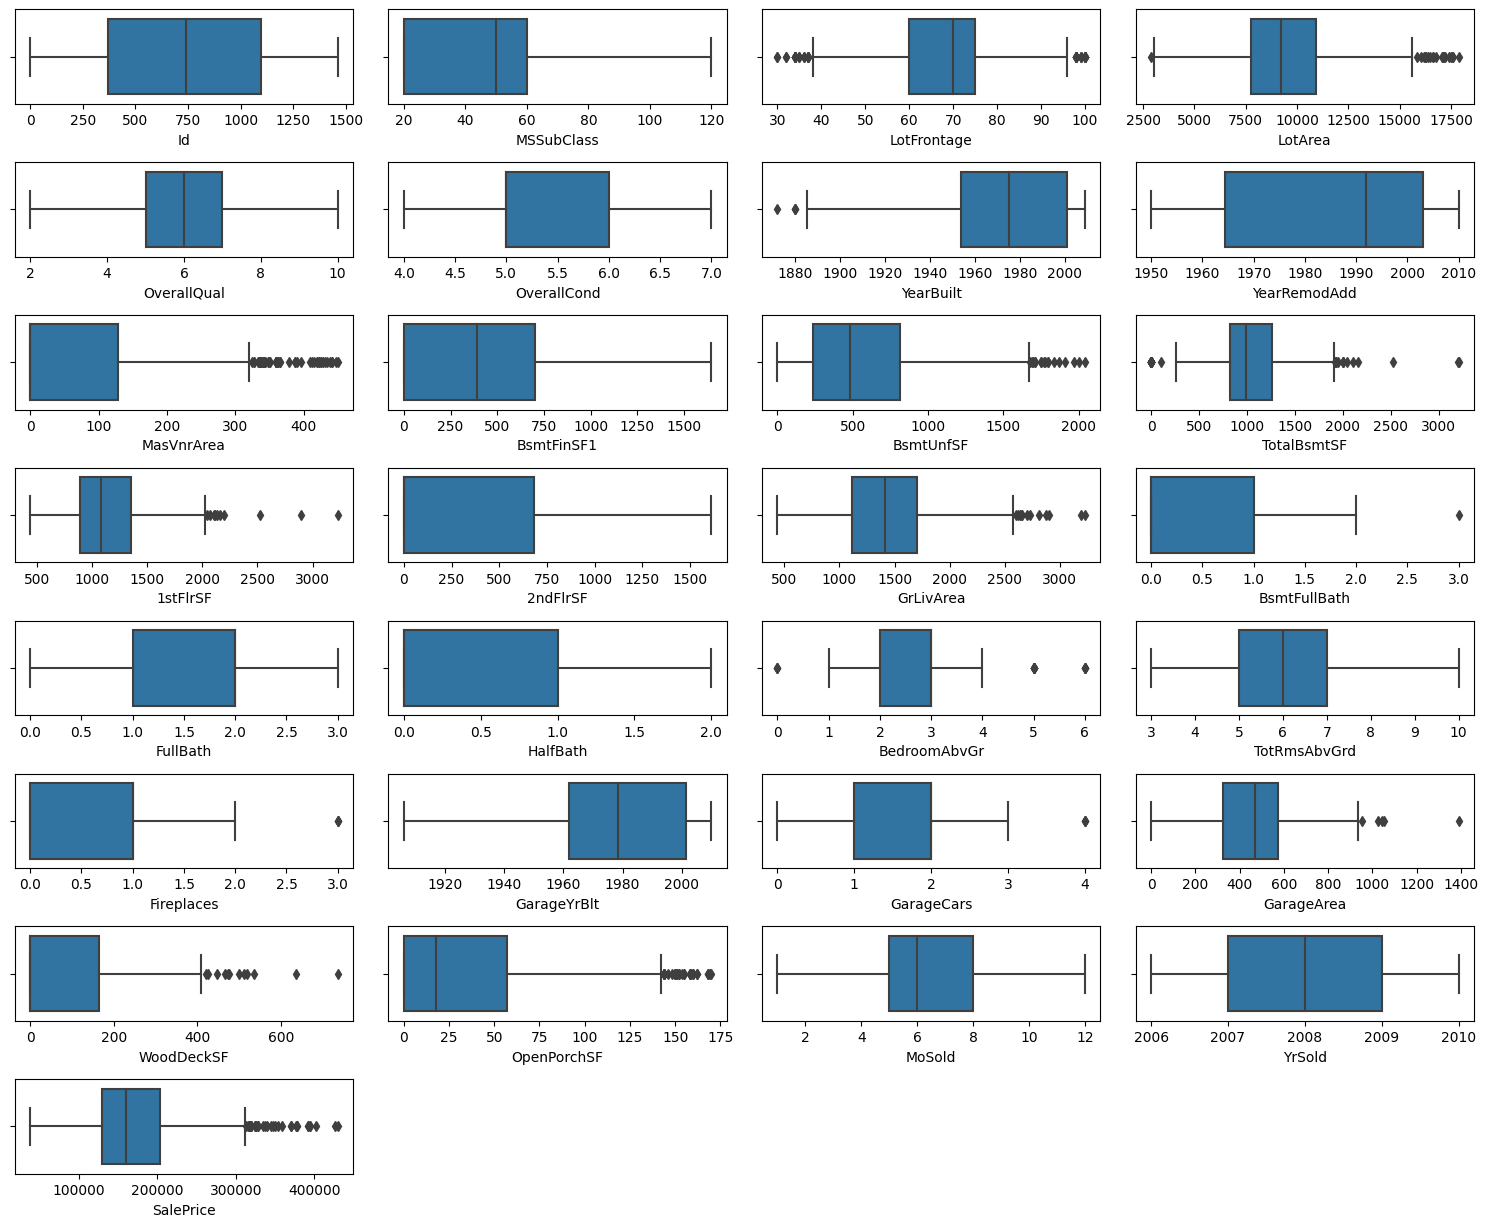

In [73]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

In [74]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [75]:
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=encoder.fit_transform(data[i])

In [76]:
data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   
5   6          50         3         85.0    14115       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             3           2   
2            3          0          4          0             3           2   
3            3          0          0          0             4           2   
4            3          0          2          0            13           2   
5            3          0          4          0             9           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         0           4            7            5       2003   
2           1         0           4            7            5       2001   
3           1         0           4            7            5       1915   
4           1         0           4            8            5       2000   
5           1         0           0            5            5       1993   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         0           11           12           1   
2          2002          1         0           11           12           1   
3          1970          1         0           12           14           2   
4          2000          1         0           11           12           1   
5          1995          1         0           11           12           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          2           2         2         2   
2       162.0          2          2           2         2         2   
3         0.0          3          2           0         3         1   
4       350.0          2          2           2         2         2   
5         0.0          3          2           5         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0             3             2         706             5        150   
2             2             2         486             5        434   
3             3             0         216             5        540   
4             0             2         655             5        490   
5             3             2         732             5         64   

   TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0          856        1          0           1           3       856   
2          920        1          0           1           3       920   
3          756        1          2           1           3       961   
4         1145        1          0           1           3      1145   
5          796        1          0           1           3       796   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   
5       566       1362             1         1         1             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            2             8           5           0            2           1   
2            2             6           5           1            4           1   
3            2             7           5           1            2           5   
4            2             9           5           1            4           1   
5            3             5           5           0    

In [77]:
data.shape

(1011, 68)

#Feature selection

<Axes: >

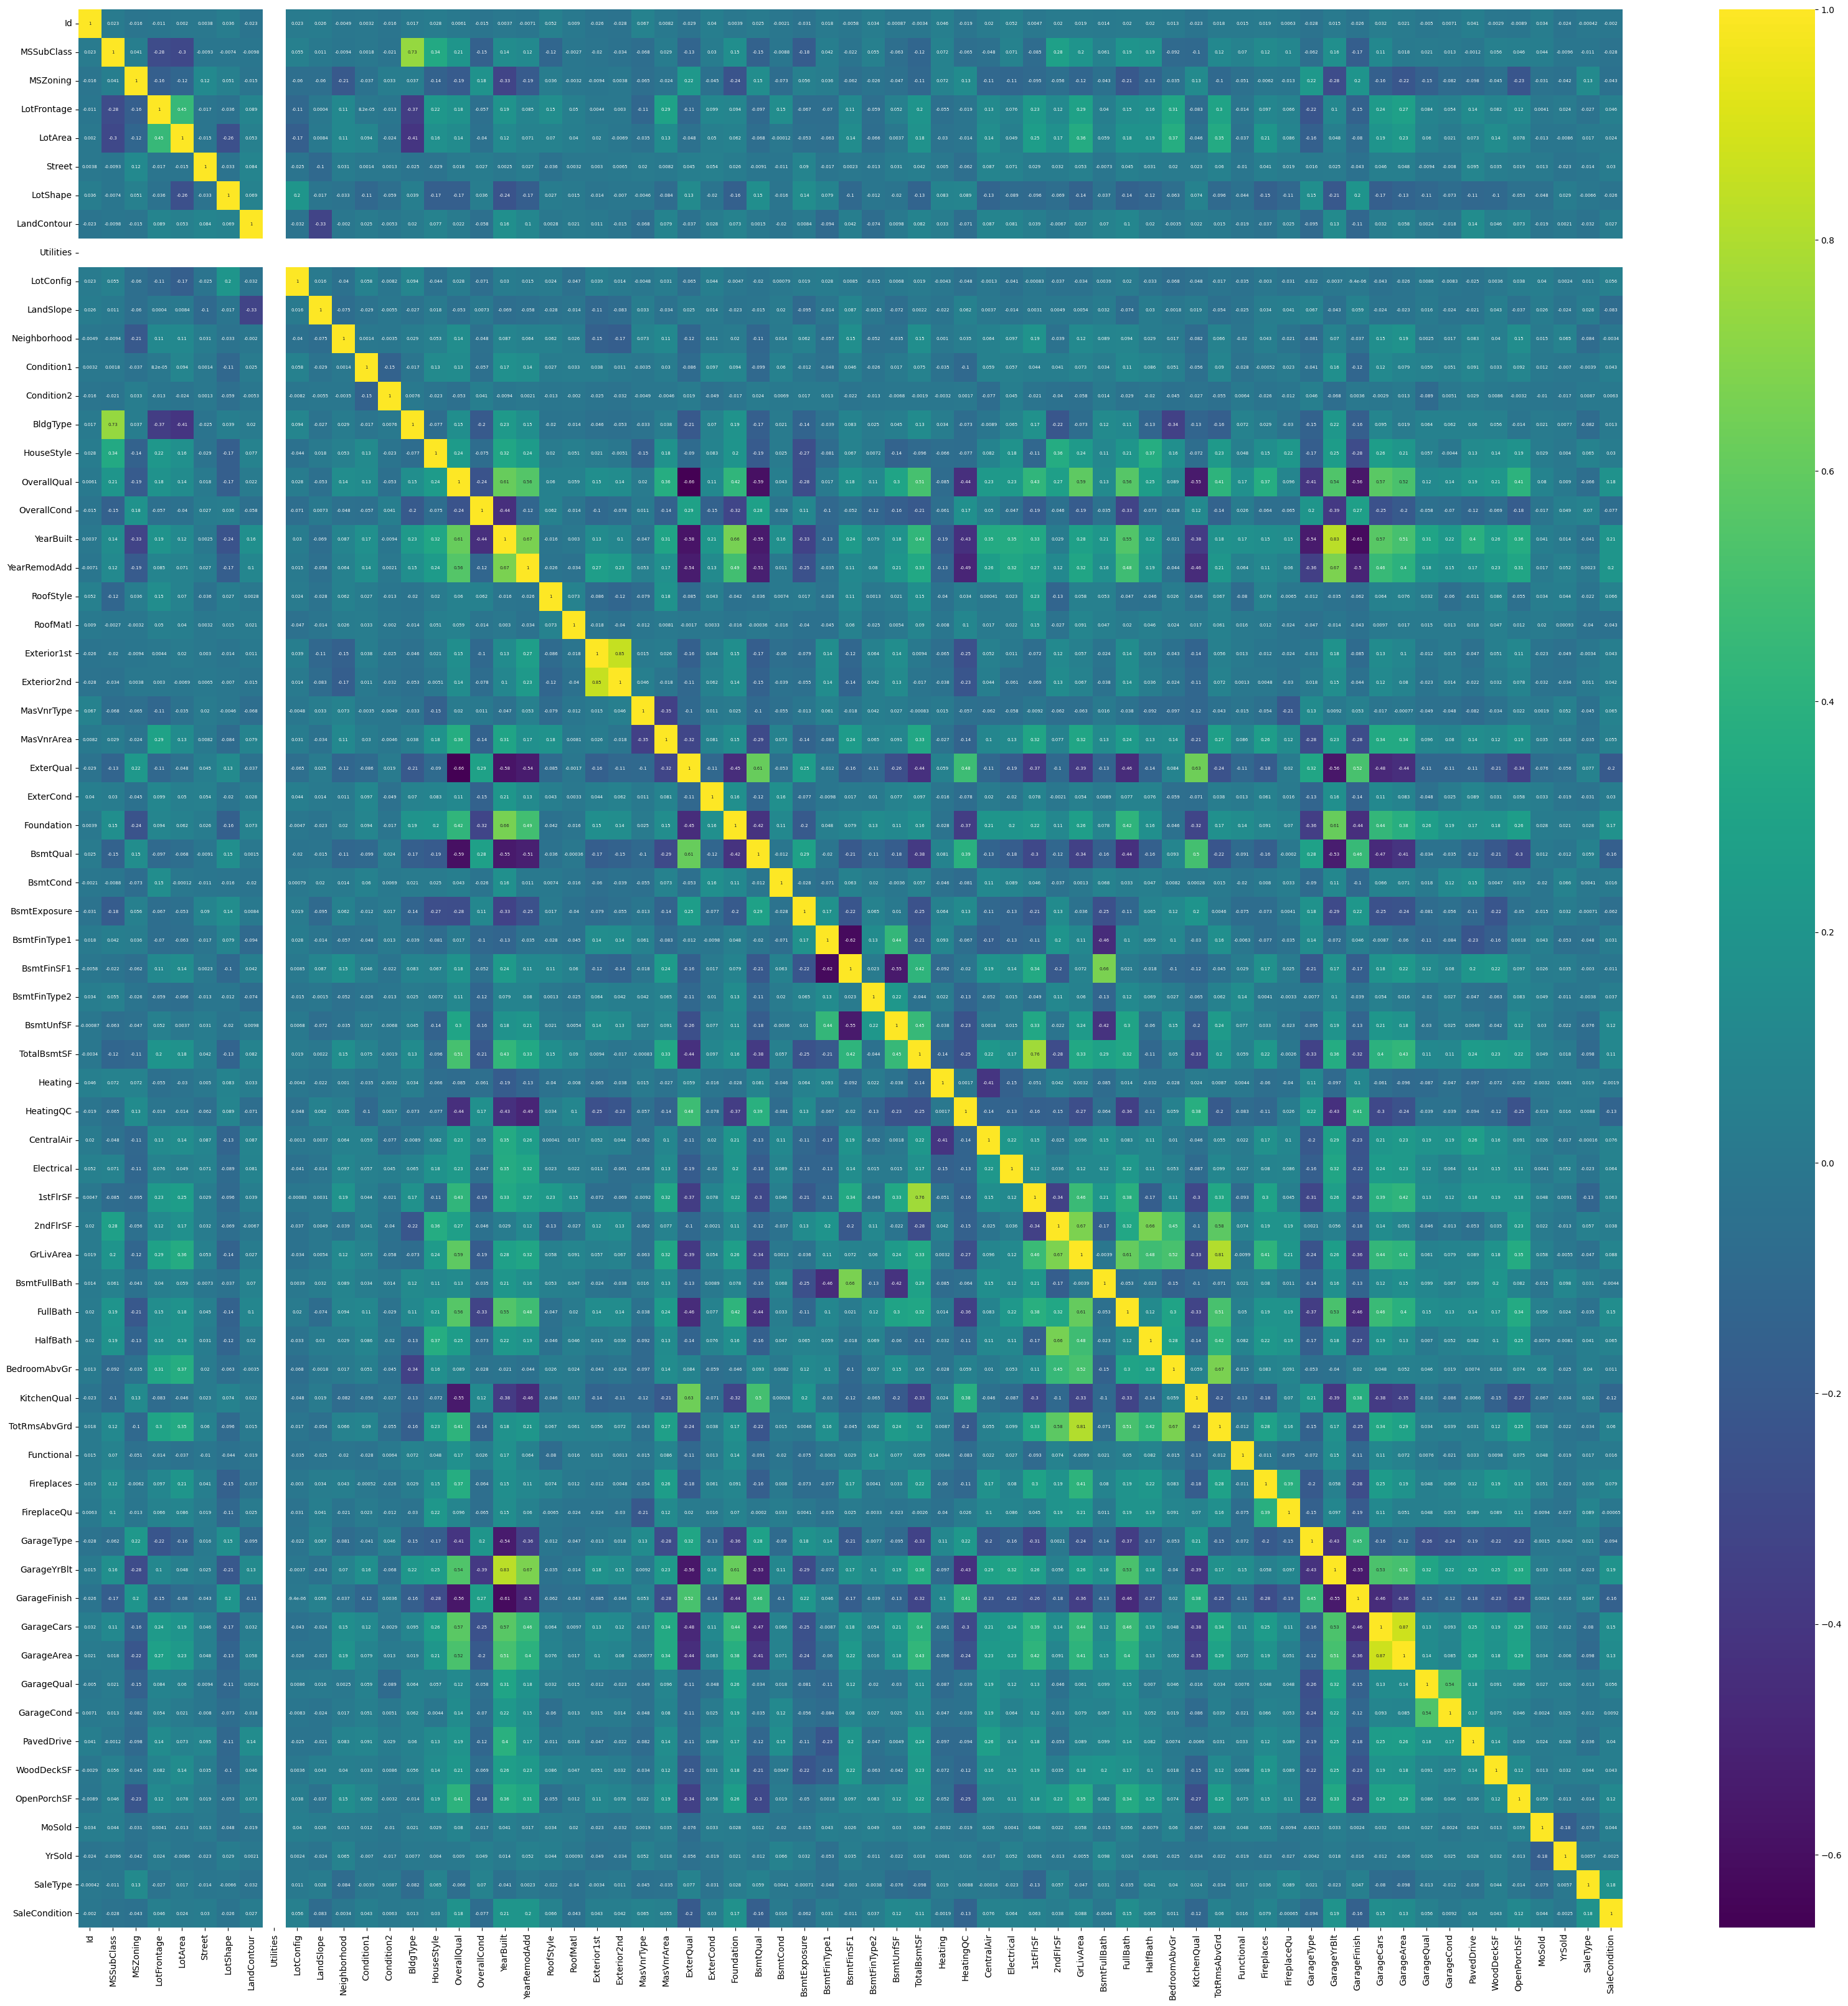

In [78]:
plt.figure(figsize=(40,40))
sns.heatmap(data.iloc[:,:-1].corr(),annot=True,annot_kws={'size':5},cmap='viridis')

In [79]:
data.drop('Id',axis=1,inplace=True)

In [80]:
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   
5          50         3         85.0    14115       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             3           2           1   
2          0          4          0             3           2           1   
3          0          0          0             4           2           1   
4          0          2          0            13           2           1   
5          0          4          0             9           2           1   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           4            7            5       2003          2003   
2         0           4            7            5       2001          2002   
3         0           4            7            5       1915          1970   
4         0           4            8            5       2000          2000   
5         0           0            5            5       1993          1995   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         0           11           12           1       196.0   
2          1         0           11           12           1       162.0   
3          1         0           12           14           2         0.0   
4          1         0           11           12           1       350.0   
5          1         0           11           12           2         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          2           2         2         2             3   
2          2          2           2         2         2             2   
3          3          2           0         3         1             3   
4          2          2           2         2         2             0   
5          3          2           5         2         2             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  \
0             2         706             5        150          856        1   
2             2         486             5        434          920        1   
3             0         216             5        540          756        1   
4             2         655             5        490         1145        1   
5             2         732             5         64          796        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0          0           1           3       856       854       1710   
2          0           1           3       920       866       1786   
3          2           1           3       961       756       1717   
4          0           1           3      1145      1053       2198   
5          0           1           3       796       566       1362   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3            2             8   
2             1         2         1             3            2             6   
3             1         1         0             3            2             7   
4             1         2         1             4            2             9   
5             1         1         1             1            3             5   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           5           0            2           1       2003.0             1   
2           5           1            4           1       2001.0             1   
3           5           1            2           5       1998.0             2   

In [81]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [82]:
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   
5          50         3         85.0    14115       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             3           2           1   
2          0          4          0             3           2           1   
3          0          0          0             4           2           1   
4          0          2          0            13           2           1   
5          0          4          0             9           2           1   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           4            7            5       2003          2003   
2         0           4            7            5       2001          2002   
3         0           4            7            5       1915          1970   
4         0           4            8            5       2000          2000   
5         0           0            5            5       1993          1995   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         0           11           12           1       196.0   
2          1         0           11           12           1       162.0   
3          1         0           12           14           2         0.0   
4          1         0           11           12           1       350.0   
5          1         0           11           12           2         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          2           2         2         2             3   
2          2          2           2         2         2             2   
3          3          2           0         3         1             3   
4          2          2           2         2         2             0   
5          3          2           5         2         2             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  \
0             2         706             5        150          856        1   
2             2         486             5        434          920        1   
3             0         216             5        540          756        1   
4             2         655             5        490         1145        1   
5             2         732             5         64          796        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0          0           1           3       856       854       1710   
2          0           1           3       920       866       1786   
3          2           1           3       961       756       1717   
4          0           1           3      1145      1053       2198   
5          0           1           3       796       566       1362   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3            2             8   
2             1         2         1             3            2             6   
3             1         1         0             3            2             7   
4             1         2         1             4            2             9   
5             1         1         1             1            3             5   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           5           0            2           1       2003.0             1   
2           5           1            4           1       2001.0             1   
3           5           1            2           5       1998.0             2   

In [83]:
y.head()

0    208500
2    223500
3    140000
4    250000
5    143000
Name: SalePrice, dtype: int64

In [84]:
from sklearn.feature_selection import SelectKBest,chi2

In [85]:
top_features=SelectKBest(score_func=chi2,k=50)
top_ranked_features=top_features.fit(X,y)

In [86]:
top_ranked_features.scores_

array([1.00364602e+04, 7.18347519e+01, 1.48981479e+03, 4.73522571e+05,
       1.33201189e+00, 6.01195626e+02, 9.45687790e+01,            nan,
       4.03007511e+02, 5.50947399e+02, 2.00906573e+03, 1.70021393e+02,
       6.60958016e+00, 1.73698596e+03, 4.27839019e+02, 2.30511263e+02,
       6.20788303e+01, 3.22999381e+02, 1.49246415e+02, 2.40849747e+02,
       1.00080536e+03, 5.83700745e+02, 6.46806046e+02, 1.20439372e+02,
       1.09078849e+05, 1.14863209e+02, 2.97893895e+01, 2.30508781e+02,
       2.06679900e+02, 3.73802999e+01, 3.33840133e+02, 5.72931353e+02,
       2.43841456e+05, 8.38109537e+01, 1.94620096e+05, 1.00667894e+05,
       5.94839075e+01, 1.13377821e+03, 3.56827819e+01, 1.19775325e+02,
       6.52330882e+04, 3.31956208e+05, 9.28092331e+04, 3.41881622e+02,
       1.30381351e+02, 4.37800943e+02, 1.01401452e+02, 1.80532890e+02,
       1.83294319e+02, 3.53815105e+01, 3.98307972e+02, 1.61889696e+02,
       8.07601681e+02, 2.02746094e+02, 3.60717010e+02, 2.05652347e+02,
      

In [87]:
top_df=pd.DataFrame(top_ranked_features.scores_,columns=['scores'])
top_df.head()

scores
0   10036.460220
1      71.834752
2    1489.814794
3  473522.571456
4       1.332012

In [88]:
top_df['columns']=X.columns

In [89]:
top_df.head()

scores      columns
0   10036.460220   MSSubClass
1      71.834752     MSZoning
2    1489.814794  LotFrontage
3  473522.571456      LotArea
4       1.332012       Street

In [90]:
sorted_df=top_df.nlargest(50,'scores')

<Axes: xlabel='scores', ylabel='columns'>

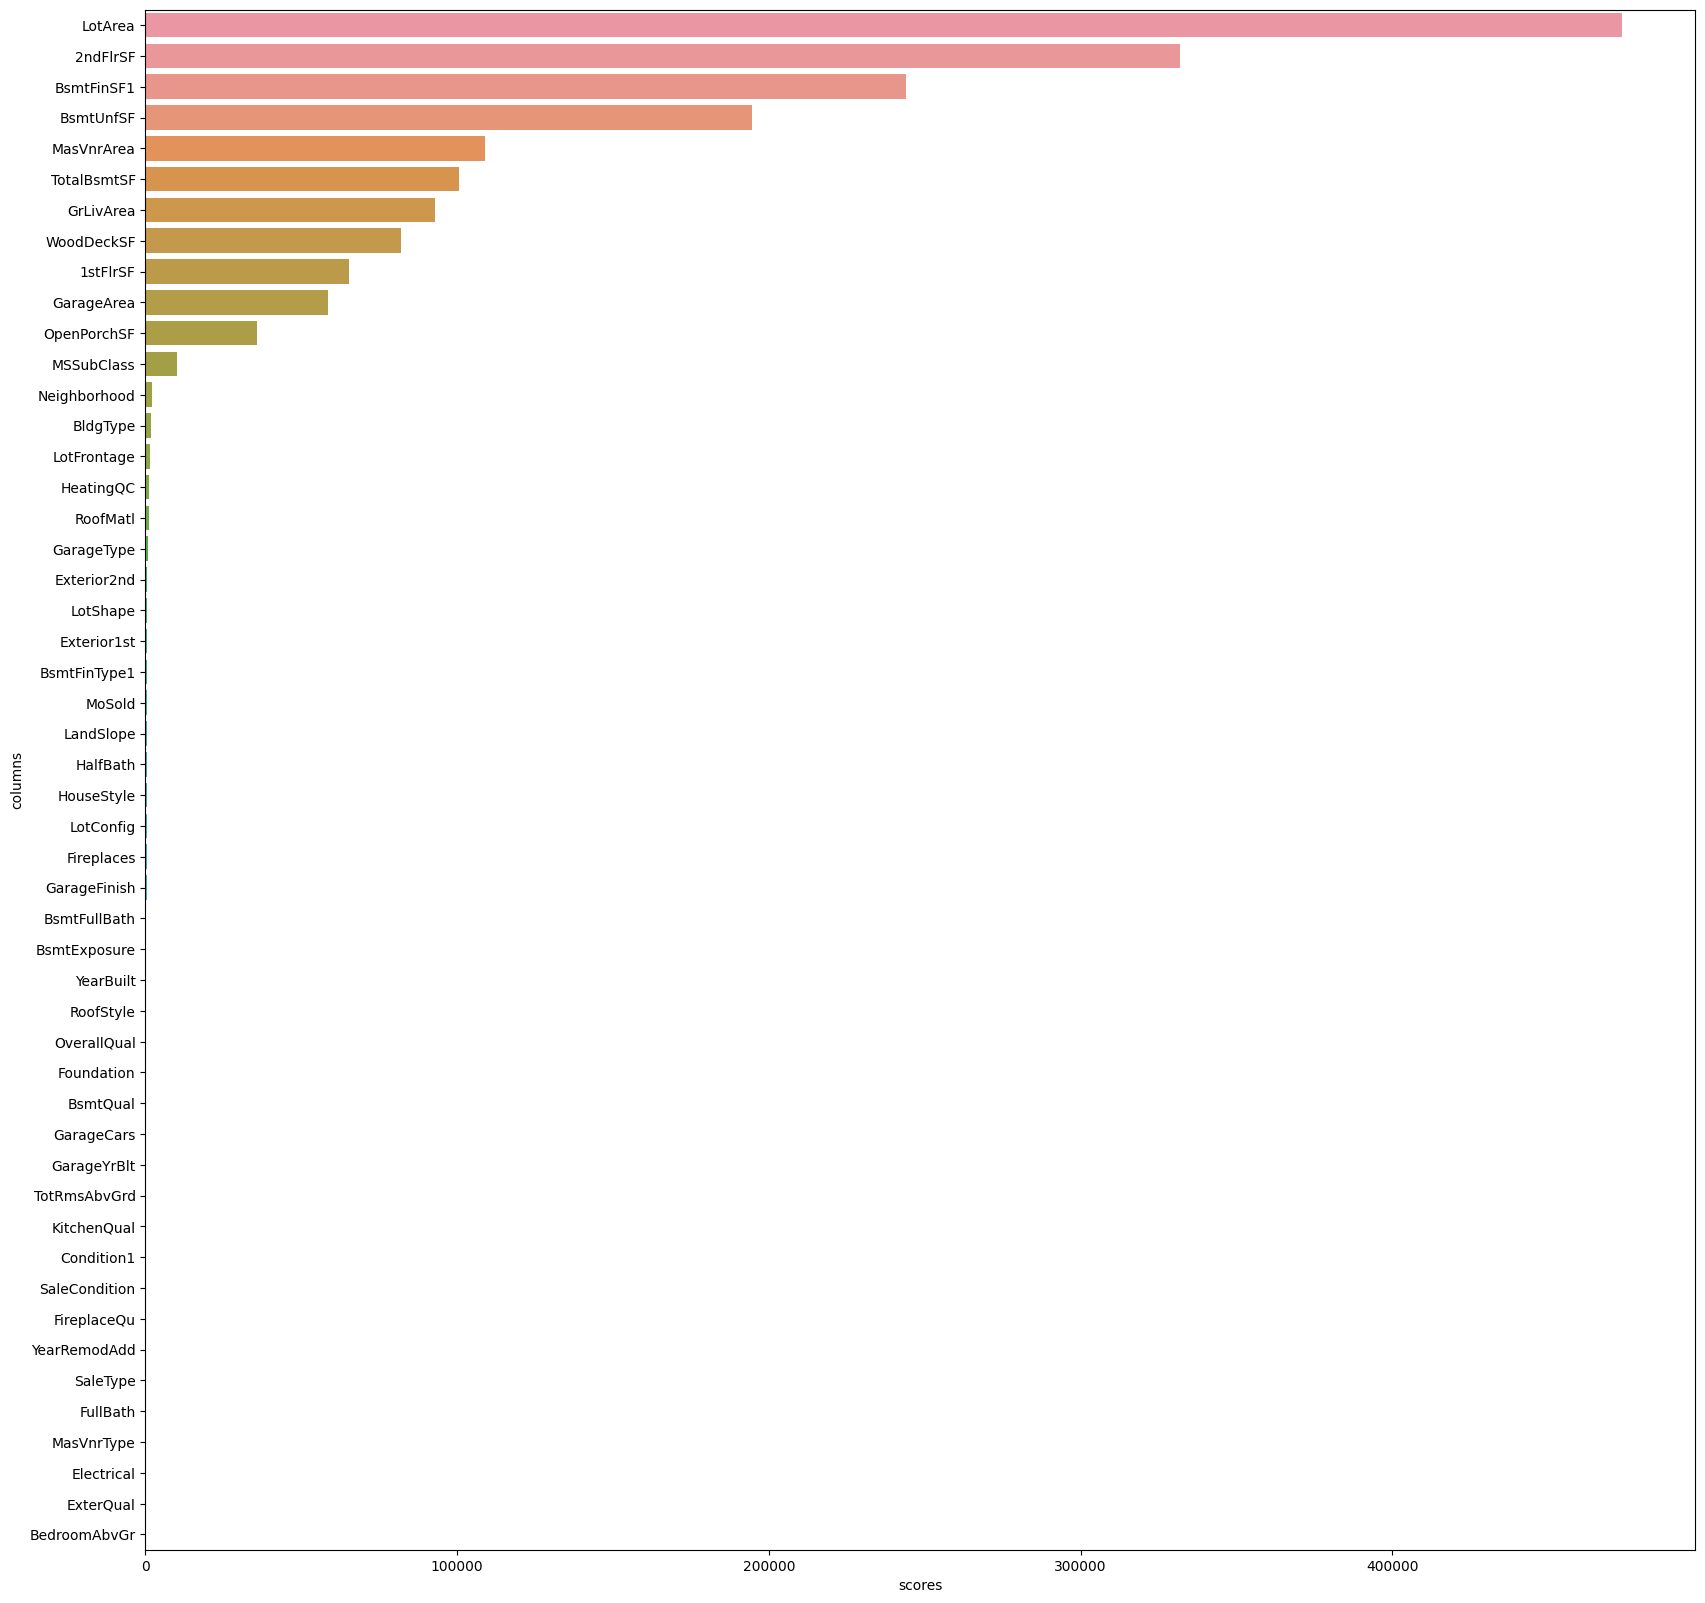

In [91]:
plt.figure(figsize=(20,20))
sns.barplot(sorted_df,x=sorted_df['scores'],y=sorted_df['columns'])

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [93]:
model.feature_importances_

array([0.01589179, 0.00899518, 0.02830988, 0.03118992, 0.000197  ,
       0.01569706, 0.0065633 , 0.        , 0.01678401, 0.00349437,
       0.0242867 , 0.00925715, 0.00055839, 0.00549516, 0.01335083,
       0.02083175, 0.01610479, 0.02814527, 0.02719918, 0.01160028,
       0.00055233, 0.01948191, 0.02024195, 0.01459927, 0.0198768 ,
       0.00774744, 0.00718395, 0.01143831, 0.01163583, 0.00567676,
       0.01663594, 0.02097785, 0.0264868 , 0.00790939, 0.03117856,
       0.02946359, 0.00131764, 0.01594607, 0.00342884, 0.00591977,
       0.03081355, 0.01618017, 0.03158854, 0.01561259, 0.0093199 ,
       0.01110634, 0.01718875, 0.01282919, 0.02397018, 0.00425342,
       0.01679965, 0.01208307, 0.01209259, 0.02767538, 0.01539779,
       0.01389373, 0.03140769, 0.00304723, 0.00220161, 0.0041747 ,
       0.02363331, 0.02289749, 0.03105931, 0.02945285, 0.00858564,
       0.01108432])

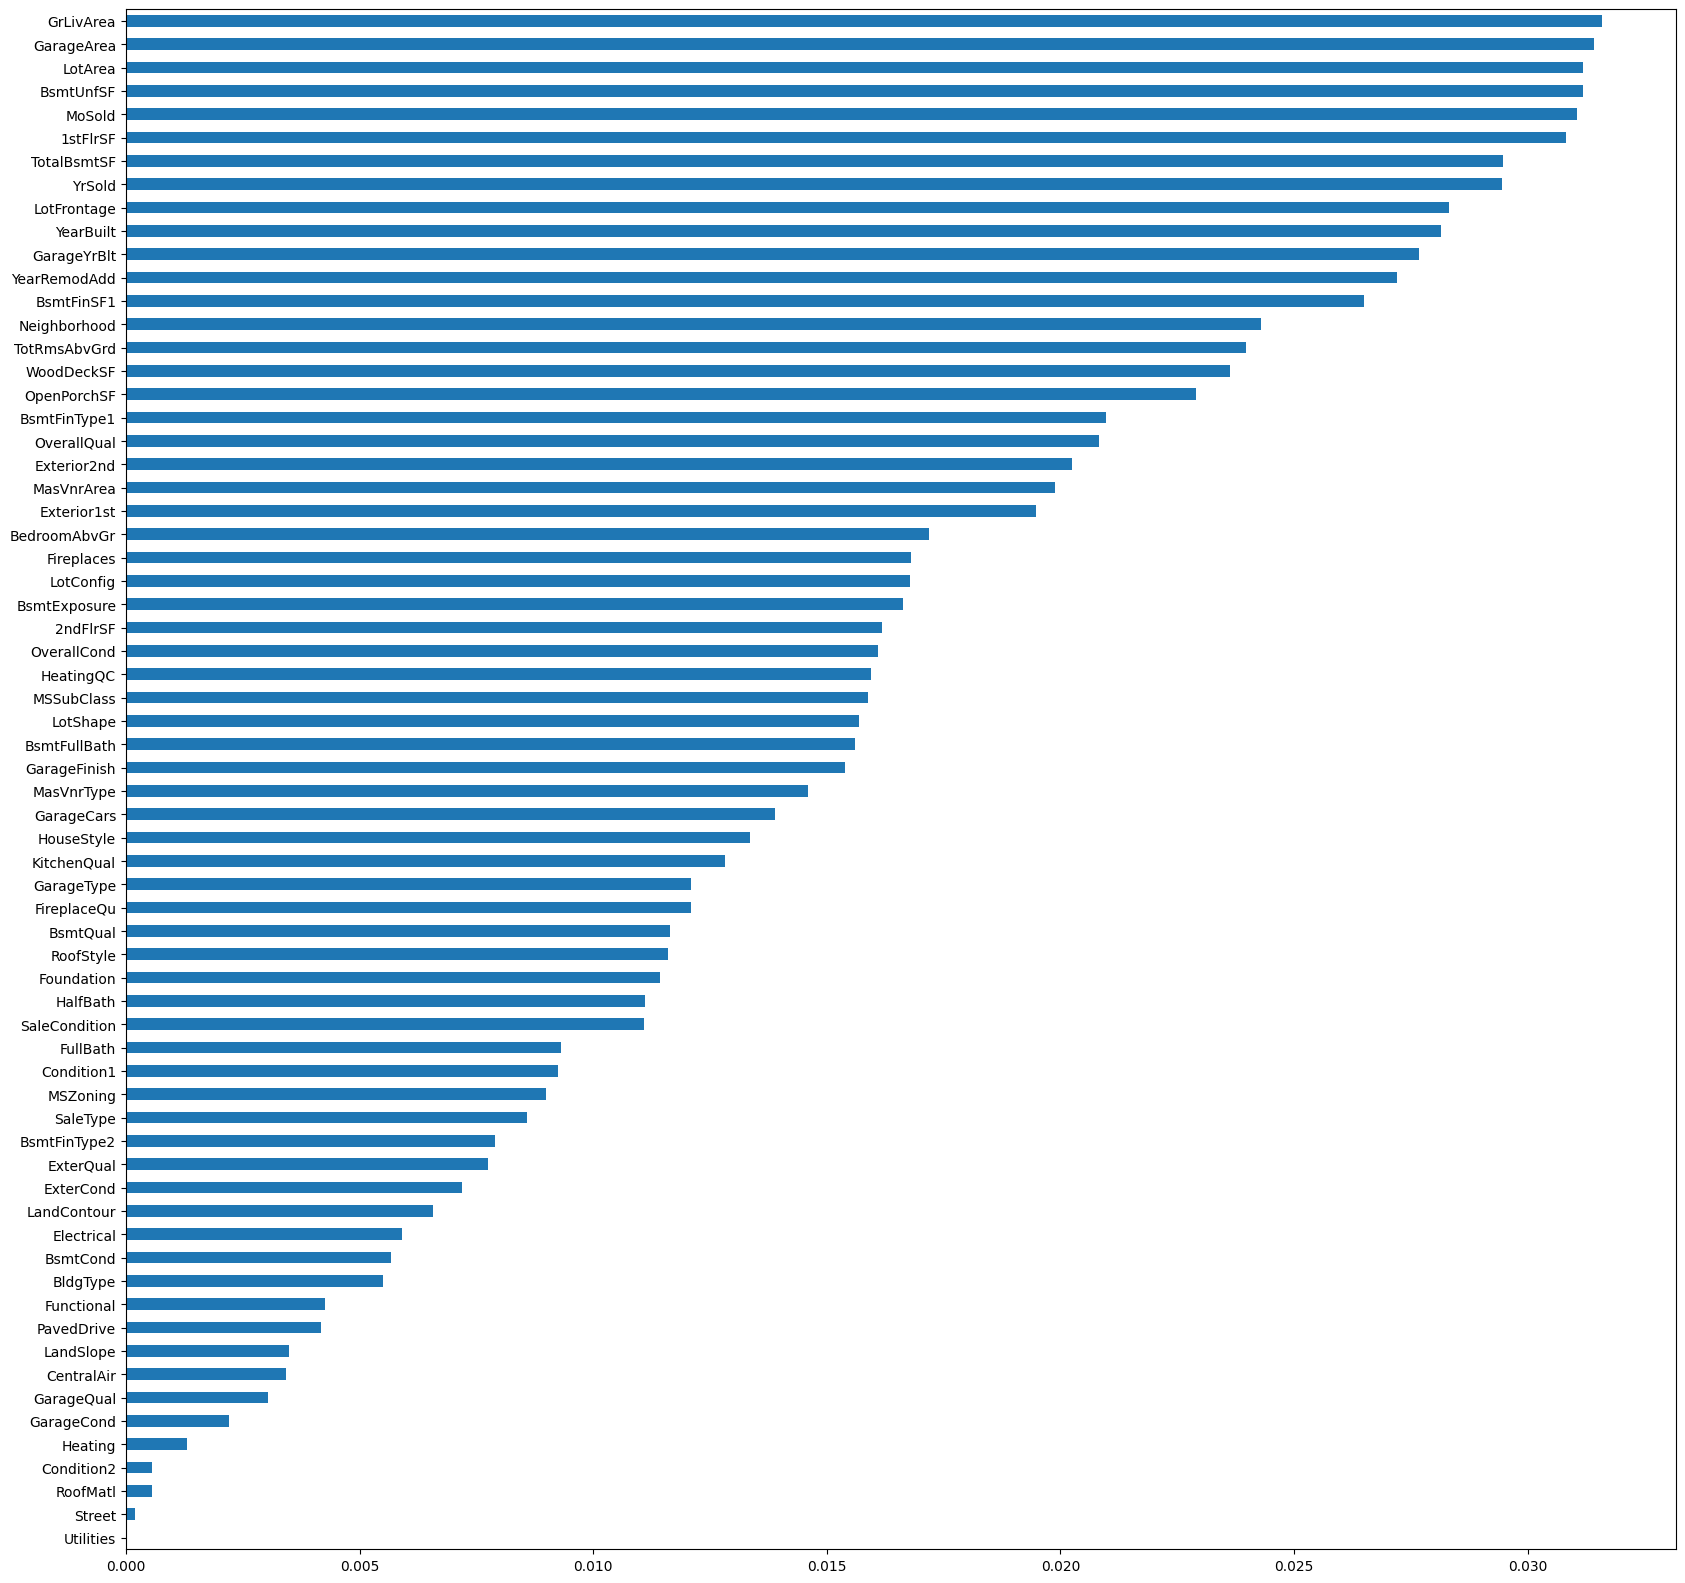

In [94]:
plt.figure(figsize=(20,20))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [95]:
from sklearn.feature_selection import mutual_info_regression

In [96]:
mutual_info=mutual_info_regression(X,y)

<Axes: >

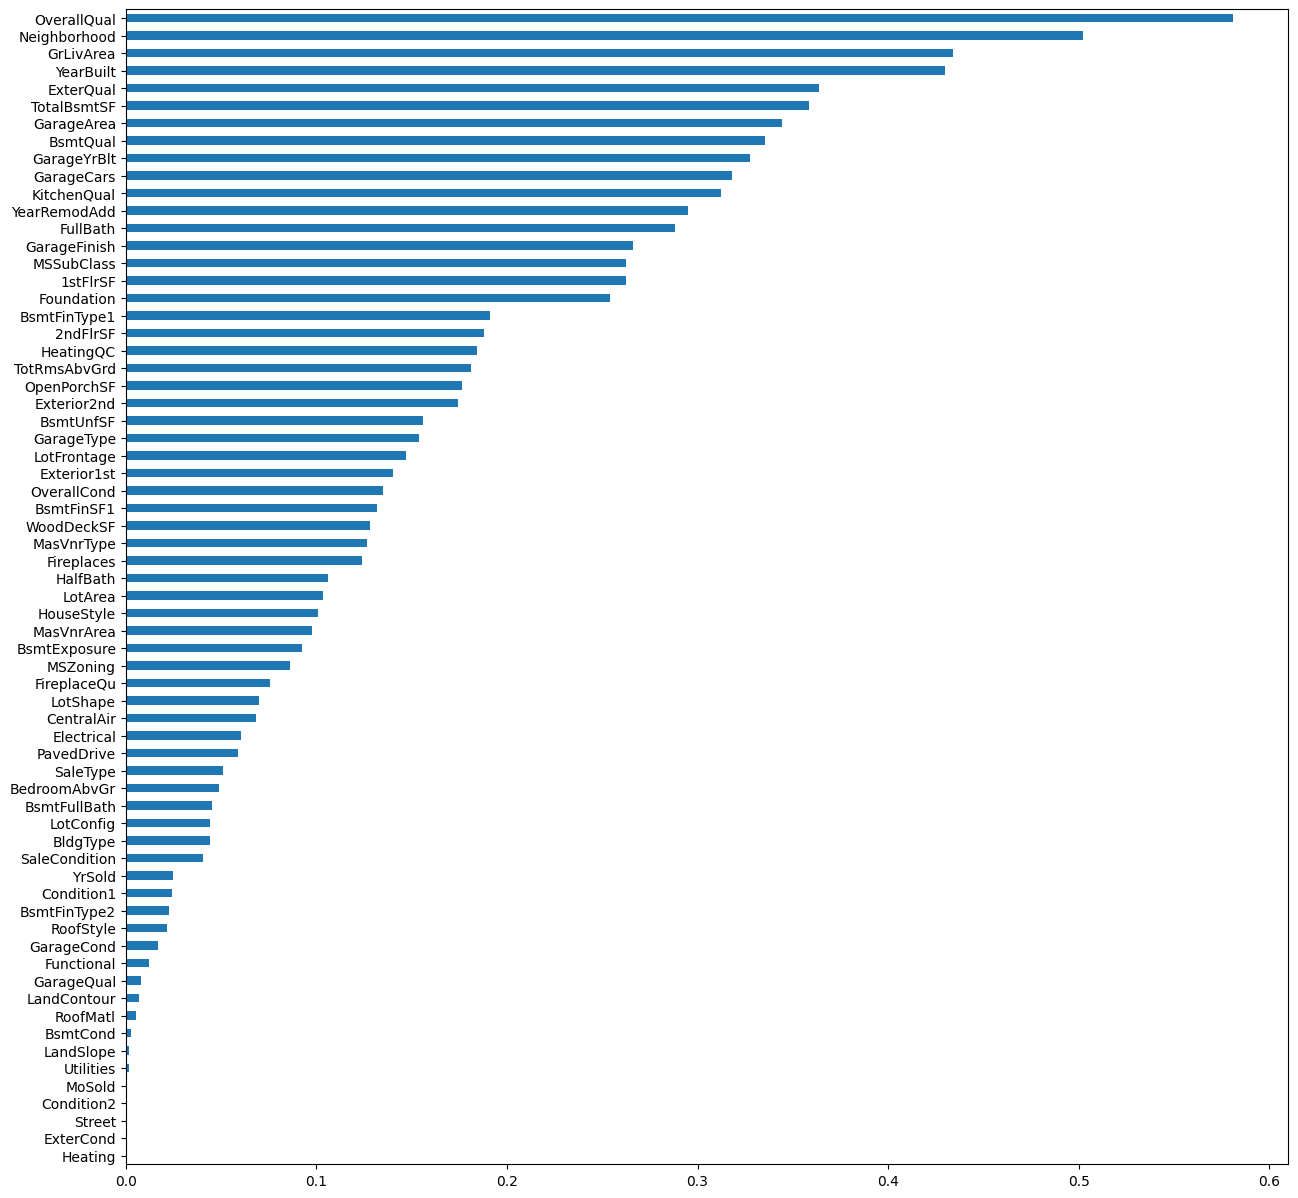

In [97]:
plt.figure(figsize=(15,15))
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=True).plot(kind='barh')



In [98]:
len(mutual_data.sort_values(ascending=False))

66

In [99]:
mutual_data.sort_values(ascending=False)

OverallQual      0.580968
Neighborhood     0.502436
GrLivArea        0.434285
YearBuilt        0.429801
ExterQual        0.363497
TotalBsmtSF      0.358410
GarageArea       0.344391
BsmtQual         0.335402
GarageYrBlt      0.327521
GarageCars       0.317958
KitchenQual      0.312285
YearRemodAdd     0.294966
FullBath         0.288308
GarageFinish     0.265907
MSSubClass       0.262481
1stFlrSF         0.262362
Foundation       0.254293
BsmtFinType1     0.190872
2ndFlrSF         0.187992
HeatingQC        0.184373
TotRmsAbvGrd     0.181195
OpenPorchSF      0.176656
Exterior2nd      0.174373
BsmtUnfSF        0.156089
GarageType       0.153790
LotFrontage      0.146974
Exterior1st      0.140448
OverallCond      0.135170
BsmtFinSF1       0.131532
WoodDeckSF       0.128337
MasVnrType       0.126441
Fireplaces       0.123745
HalfBath         0.106150
LotArea          0.103695
HouseStyle       0.100758
MasVnrArea       0.097459
BsmtExposure     0.092355
MSZoning         0.086399
FireplaceQu 

In [100]:
mutual_data.sort_values(ascending=False)[:-9]

OverallQual      0.580968
Neighborhood     0.502436
GrLivArea        0.434285
YearBuilt        0.429801
ExterQual        0.363497
TotalBsmtSF      0.358410
GarageArea       0.344391
BsmtQual         0.335402
GarageYrBlt      0.327521
GarageCars       0.317958
KitchenQual      0.312285
YearRemodAdd     0.294966
FullBath         0.288308
GarageFinish     0.265907
MSSubClass       0.262481
1stFlrSF         0.262362
Foundation       0.254293
BsmtFinType1     0.190872
2ndFlrSF         0.187992
HeatingQC        0.184373
TotRmsAbvGrd     0.181195
OpenPorchSF      0.176656
Exterior2nd      0.174373
BsmtUnfSF        0.156089
GarageType       0.153790
LotFrontage      0.146974
Exterior1st      0.140448
OverallCond      0.135170
BsmtFinSF1       0.131532
WoodDeckSF       0.128337
MasVnrType       0.126441
Fireplaces       0.123745
HalfBath         0.106150
LotArea          0.103695
HouseStyle       0.100758
MasVnrArea       0.097459
BsmtExposure     0.092355
MSZoning         0.086399
FireplaceQu 

In [101]:
X_selceted=X[mutual_data.sort_values(ascending=False)[:-9].index]

In [102]:
X_selceted.head()

OverallQual  Neighborhood  GrLivArea  YearBuilt  ExterQual  TotalBsmtSF  \
0            7             3       1710       2003          2          856   
2            7             3       1786       2001          2          920   
3            7             4       1717       1915          3          756   
4            8            13       2198       2000          2         1145   
5            5             9       1362       1993          3          796   

   GarageArea  BsmtQual  GarageYrBlt  GarageCars  KitchenQual  YearRemodAdd  \
0         548         2       2003.0           2            2          2003   
2         608         2       2001.0           2            2          2002   
3         642         3       1998.0           3            2          1970   
4         836         2       2000.0           3            2          2000   
5         480         2       1993.0           2            3          1995   

   FullBath  GarageFinish  MSSubClass  1stFlrSF  Foundation  BsmtFinType1  \
0         2             1          60       856           2             2   
2         2             1          60       920           2             2   
3         1             2          70       961           0             0   
4         2             1          60      1145           2             2   
5         1             2          50       796           5             2   

   2ndFlrSF  HeatingQC  TotRmsAbvGrd  OpenPorchSF  Exterior2nd  BsmtUnfSF  \
0       854          0             8           61           12        150   
2       866          0             6           42           12        434   
3       756          2             7           35           14        540   
4      1053          0             9           84           12        490   
5       566          0             5           30           12         64   

   GarageType  LotFrontage  Exterior1st  OverallCond  BsmtFinSF1  WoodDeckSF  \
0           1         65.0           11            5         706           0   
2           1         68.0           11            5         486           0   
3           5         60.0           12            5         216           0   
4           1         84.0           11            5         655         192   
5           1         85.0           11            5         732          40   

   MasVnrType  Fireplaces  HalfBath  LotArea  HouseStyle  MasVnrArea  \
0           1           0         1     8450           4       196.0   
2           1           1         1    11250           4       162.0   
3           2           1         0     9550           4         0.0   
4           1           1         1    14260           4       350.0   
5           2           0         1    14115           0         0.0   

   BsmtExposure  MSZoning  FireplaceQu  LotShape  CentralAir  Electrical  \
0             3         3            2         3           1           3   
2             2         3            4         0           1           3   
3             3         3            2         0           1           3   
4             0         3            4         0           1           3   
5             3         3            2         0           1           3   

   PavedDrive  SaleType  BedroomAbvGr  BsmtFullBath  LotConfig  BldgType  \
0           2         8             3             1          4         0   
2           2         8             3             1          4         0   
3           2         8             3             1          0         0   
4           2         8             4             1          2         0   
5           2         8             1             1          4         0   

   SaleCondition  YrSold  Condition1  BsmtFinType2  RoofStyle  GarageCond  \
0              4    2008           2             5          1           4   
2              4    2008           2             5          1           4   
3              0    2006           2             5          1           4 

#scaling of data 

In [103]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=MinMaxScaler()

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selceted, y, test_size=0.3, random_state=42)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(707, 57)
(304, 57)
(707,)
(304,)


In [106]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Model Creation

In [107]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##Linear Regression Model

In [108]:
all_model={'model_name':[],'r2_score':[],'mae':[],'mse':[]}
all_model1={'model_name':[],'r2_score_train':[],'mae_train':[],'mse_train':[]}

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [110]:
lr_model=LinearRegression()

In [111]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [112]:
lr_pred=lr_model.predict(X_test_scaled)

print('r2 score is ',r2_score(y_test,lr_pred))
print('mae score is ',mean_absolute_error(y_test,lr_pred))  
print('mse score is ',mean_squared_error(y_test,lr_pred)) 

all_model['model_name'].append('linear_reg')
all_model['r2_score'].append(r2_score(y_test,lr_pred))
all_model['mae'].append(mean_absolute_error(y_test,lr_pred))
all_model['mse'].append(mean_squared_error(y_test,lr_pred))


lr_pred_train=lr_model.predict(X_train_scaled)

print('r2 score is ',r2_score(y_train,lr_pred_train))
print('mae score is ',mean_absolute_error(y_train,lr_pred_train))  
print('mse score is ',mean_squared_error(y_train,lr_pred_train))

all_model1['model_name'].append('linear_reg')
all_model1['r2_score_train'].append(r2_score(y_train,lr_pred_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,lr_pred_train))
all_model1['mse_train'].append(mean_squared_error(y_train,lr_pred_train))





r2 score is  0.8990772608069448
mae score is  14793.754526162274
mse score is  374037387.56519526
r2 score is  0.8978106672507857
mae score is  13901.034160195848
mse score is  385993980.2165348


##ridge regression model

In [113]:
from sklearn.linear_model import Ridge

ridge_regresser=Ridge()

params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_grid=GridSearchCV(ridge_regresser,param_grid=params_Ridge)

In [114]:
# ridge_grid.fit(X_train_scaled,y_train)

In [115]:
# ridge_grid.best_params_

In [116]:
ridge_regresser1=Ridge(alpha=1, fit_intercept= False, solver='lsqr')

In [117]:
#fitting on training data
ridge_regresser1.fit(X_train_scaled,y_train)

#predicting  on test data
ridge_pred1=ridge_regresser1.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,ridge_pred1))
print('mae score is ',mean_absolute_error(y_test,ridge_pred1))  
print('mse score is ',mean_squared_error(y_test,ridge_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ridge_regresser1')
all_model['r2_score'].append(r2_score(y_test,ridge_pred1))
all_model['mae'].append(mean_absolute_error(y_test,ridge_pred1))
all_model['mse'].append(mean_squared_error(y_test,ridge_pred1))

#predicting on train data
ridge_regresser1_train=ridge_regresser1.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,ridge_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,ridge_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,ridge_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('ridge_regresser1')
all_model1['r2_score_train'].append(r2_score(y_train,ridge_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ridge_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ridge_regresser1_train))





r2 score is  0.8990192342472211
mae score is  14789.27090329645
mse score is  374252444.18159324


r2 score is  0.8957658050400286
mae score is  13967.490515123405
mse score is  393717922.4567842




## Lasso regression model




In [118]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso()

params_lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}

lasso_grid=GridSearchCV(lasso_reg,param_grid=params_lasso)

In [119]:
lasso_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})

In [120]:
lasso_grid.best_params_

{'alpha': 1}

In [121]:
lasso_reg1=Lasso(alpha=1)



In [122]:
#fitting on training data
lasso_reg1.fit(X_train_scaled,y_train)

#predicting  on test data
lasso_pred1=lasso_reg1.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,lasso_pred1))
print('mae score is ',mean_absolute_error(y_test,lasso_pred1))  
print('mse score is ',mean_squared_error(y_test,lasso_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('lasso_reg1')
all_model['r2_score'].append(r2_score(y_test,lasso_pred1))
all_model['mae'].append(mean_absolute_error(y_test,lasso_pred1))
all_model['mse'].append(mean_squared_error(y_test,lasso_pred1))

#predicting on train data
lasso_regresser1_train=lasso_reg1.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,lasso_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,lasso_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,lasso_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('lasso_reg1')
all_model1['r2_score_train'].append(r2_score(y_train,lasso_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,lasso_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,lasso_regresser1_train))





r2 score is  0.8990929284254182
mae score is  14791.014027235027
mse score is  373979320.6208179


r2 score is  0.8978088821719594
mae score is  13899.83826848472
mse score is  386000722.89370686


##SVM regression

In [123]:
from sklearn.svm import  SVR

In [124]:
svr_model=SVR() 

In [125]:
#fitting on training data
svr_model.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred=svr_model.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,svr_pred))
print('mae score is ',mean_absolute_error(y_test,svr_pred))  
print('mse score is ',mean_squared_error(y_test,svr_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model')
all_model['r2_score'].append(r2_score(y_test,svr_pred))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred))
all_model['mse'].append(mean_squared_error(y_test,svr_pred))

#predicting on train data
sv_regresser1_train=svr_model.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,sv_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser1_train))





r2 score is  -0.016370313832326344
mae score is  46125.556004299855
mse score is  3766846798.098215


r2 score is  -0.03196105315702802
mae score is  46694.04612822767
mse score is  3897968052.2436047


####Gridseacrh cv - SVM

In [126]:
# params=[{'C':[1,10,100],
#          'kernel':['rbf','linear','poly'],
#          'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#          }]

# grid_search=GridSearchCV(SVR(),
#                          param_grid=params,
#                          cv=5,
#                          n_jobs=-1,
#                          scoring='r2'
#                          )

# grid_search.fit(X_train_scaled,y_train)

In [127]:
# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [128]:
svr_model1=SVR(C= 100, gamma= 0.5, kernel= 'poly')


In [129]:
#fitting on training data
svr_model1.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred1=svr_model1.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,svr_pred1))
print('mae score is ',mean_absolute_error(y_test,svr_pred1))  
print('mse score is ',mean_squared_error(y_test,svr_pred1))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model1')
all_model['r2_score'].append(r2_score(y_test,svr_pred1))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred1))
all_model['mse'].append(mean_squared_error(y_test,svr_pred1))

#predicting on train data
sv_regresser2_train=svr_model1.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,sv_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model1')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser2_train))





r2 score is  0.9191904755311882
mae score is  12264.024633799354
mse score is  299494283.0959153


r2 score is  0.9308179322662955
mae score is  8566.34965264103
mse score is  261317507.07950342


###random search cv - svr

In [130]:
# rand_search=RandomizedSearchCV(SVR(),
#                          param_distributions=params,
#                          cv=5,
#                          n_jobs=-1,
#                          scoring='r2'
#                          )

# rand_search.fit(X_train_scaled,y_train)

In [131]:
# print(rand_search.best_params_)
# print(rand_search.best_score_)

In [132]:
svr_model2=SVR(C= 10, gamma= 0.9, kernel= 'poly')


In [133]:
#fitting on training data
svr_model2.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred2=svr_model2.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,svr_pred2))
print('mae score is ',mean_absolute_error(y_test,svr_pred2))  
print('mse score is ',mean_squared_error(y_test,svr_pred2))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model2')
all_model['r2_score'].append(r2_score(y_test,svr_pred2))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred2))
all_model['mse'].append(mean_squared_error(y_test,svr_pred2))

#predicting on train data
sv_regresser3_train=svr_model2.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,sv_regresser3_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser3_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser3_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model2')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser3_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser3_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser3_train))





r2 score is  0.9173308545940031
mae score is  12390.15537188701
mse score is  306386364.7295272


r2 score is  0.9194710315541761
mae score is  9779.028998942327
mse score is  304177512.6315648


##Decission tree Regression

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
dt_model=DecisionTreeRegressor()

In [136]:
#fitting on training data
dt_model.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred=dt_model.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,dt_pred))
print('mae score is ',mean_absolute_error(y_test,dt_pred))  
print('mse score is ',mean_squared_error(y_test,dt_pred))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model')
all_model['r2_score'].append(r2_score(y_test,dt_pred))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred))
all_model['mse'].append(mean_squared_error(y_test,dt_pred))

#predicting on train data
dt_regresser_train=dt_model.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,dt_regresser_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser_train))





r2 score is  0.7178430930068052
mae score is  22395.309210526317
mse score is  1045723027.5263158


r2 score is  1.0
mae score is  0.0
mse score is  0.0


###Gridsearch cv - Decision tree

In [137]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [138]:
# grid_search1=GridSearchCV(DecisionTreeRegressor(),
#                          param_grid=parameters,
#                          cv=5,
#                          n_jobs=-1,
#                         scoring='r2'
#                          )
# grid_search1.fit(X_train_scaled,y_train)

In [139]:
# print(grid_search1.best_params_)
# print(grid_search1.best_score_)

In [140]:
dt_model1=DecisionTreeRegressor(max_depth= 5, max_features= 'auto', max_leaf_nodes= None, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1, splitter= 'best')


In [141]:
#fitting on training data
dt_model1.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred1=dt_model1.predict(X_test_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_test,dt_pred1))
print('mae score is ',mean_absolute_error(y_test,dt_pred1))  
print('mse score is ',mean_squared_error(y_test,dt_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model1')
all_model['r2_score'].append(r2_score(y_test,dt_pred1))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred1))
all_model['mse'].append(mean_squared_error(y_test,dt_pred1))

#predicting on train data
dt_regresser1_train=dt_model1.predict(X_train_scaled)

#metrics related to test data
print('r2 score is ',r2_score(y_train,dt_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model1')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser1_train))





r2 score is  0.6836628931783522
mae score is  24416.17422069027
mse score is  1172400848.12961


r2 score is  0.7272175636437397
mae score is  22889.484313465793
mse score is  1030365650.7936846


###randomsearch cv - decision tree

In [142]:
# rand_search1=RandomizedSearchCV(DecisionTreeRegressor(),
#                          param_distributions=parameters,
#                          cv=5,
#                          n_jobs=-1,
#                         scoring='r2'
#                          )
# rand_search1.fit(X_train_scaled,y_train)

In [143]:
# print(rand_search1.best_params_)
# print(rand_search1.best_score_)

In [144]:
dt_model2=DecisionTreeRegressor(max_depth= 3, max_features= 'sqrt', 
                                max_leaf_nodes= 60, min_samples_leaf= 1,
                                min_weight_fraction_leaf= 0.1, splitter= 'best')

In [145]:
#fitting on training data
dt_model2.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred2=dt_model2.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred2))
print('mae score is ',mean_absolute_error(y_test,dt_pred2))  
print('mse score is ',mean_squared_error(y_test,dt_pred2)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model2')
all_model['r2_score'].append(r2_score(y_test,dt_pred2))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred2))
all_model['mse'].append(mean_squared_error(y_test,dt_pred2))

#predicting on train data
dt_regresser2_train=dt_model2.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model2')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser2_train))





metrics on test data
r2 score is  0.6268027792167734
mae score is  27475.8551313998
mse score is  1383134411.7734284


metrics on train data
r2 score is  0.6226734910295916
mae score is  28300.049181313607
mse score is  1425254056.5670526


##Random forest regression

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rf_model=RandomForestRegressor()


In [148]:
#fitting on training data
rf_model.fit(X_train_scaled,y_train)

#predicting  on test data
rf_pred=rf_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,rf_pred))
print('mae score is ',mean_absolute_error(y_test,rf_pred))  
print('mse score is ',mean_squared_error(y_test,rf_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('rf_model')
all_model['r2_score'].append(r2_score(y_test,rf_pred))
all_model['mae'].append(mean_absolute_error(y_test,rf_pred))
all_model['mse'].append(mean_squared_error(y_test,rf_pred))

#predicting on train data
rf_regresser_train=rf_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,rf_regresser_train))
print('mae score is ',mean_absolute_error(y_train,rf_regresser_train))  
print('mse score is ',mean_squared_error(y_train,rf_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('rf_model')
all_model1['r2_score_train'].append(r2_score(y_train,rf_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,rf_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,rf_regresser_train))





metrics on test data
r2 score is  0.8625967697450985
mae score is  14952.523519736844
mse score is  509240491.27571607


metrics on train data
r2 score is  0.9818619734203777
mae score is  5559.07387553041
mse score is  68511740.75011809


In [149]:
params_1={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

###random seacrh - randomforest

In [150]:
# rand_search2=RandomizedSearchCV(RandomForestRegressor(),
#                          param_distributions=params_1,
#                          cv=5,
#                          n_jobs=-1
#                          )
# rand_search2.fit(X_train_scaled,y_train)

In [151]:
# print(rand_search2.best_params_)
# print(rand_search2.best_score_)

In [152]:
rf_model1=RandomForestRegressor(n_estimators=200, min_samples_split= 2, 
                                min_samples_leaf= 2, max_features= 'auto',
                                max_depth= None, bootstrap= True)


In [153]:
#fitting on training data
rf_model1.fit(X_train_scaled,y_train)

#predicting  on test data
rf_pred1=rf_model1.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,rf_pred1))
print('mae score is ',mean_absolute_error(y_test,rf_pred1))  
print('mse score is ',mean_squared_error(y_test,rf_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('rf_model1')
all_model['r2_score'].append(r2_score(y_test,rf_pred1))
all_model['mae'].append(mean_absolute_error(y_test,rf_pred1))
all_model['mse'].append(mean_squared_error(y_test,rf_pred1))

#predicting on train data
rf_regresser1_train=rf_model1.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,rf_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,rf_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,rf_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('rf_model1')
all_model1['r2_score_train'].append(r2_score(y_train,rf_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,rf_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,rf_regresser1_train))





metrics on test data
r2 score is  0.8680789055846703
mae score is  14842.874446594704
mse score is  488922733.5126363


metrics on train data
r2 score is  0.9745472555334681
mae score is  6189.8684395273685
mse score is  96141210.43516229


##using deep learning-ANN

In [154]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [155]:
ann_model=Sequential()

ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

ann_model.add(BatchNormalization())
ann_model.add(Dense(1,activation='relu'))



In [156]:
ann_model.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['mse'])

In [157]:
ann_model.fit(X_train_scaled,y_train,epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 49s 2s/step - loss: 173159.3281 - mse: 33761409024.0000
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 173159.2656 - mse: 33761374208.0000
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 173159.1719 - mse: 33761359872.0000
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 173159.1094 - mse: 33761327104.0000
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 173159.0000 - mse: 33761316864.0000
Epoch 6/50
23/23 [==============================] - 2s 83ms/step - loss: 173158.9062 - mse: 33761273856.0000
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 173158.8438 - mse: 33761257472.0000
Epoch 8/50
23/23 [==============================] - 0s 5ms/step - loss: 173158.6250 - mse: 33761202176.0000
Epoch 9/50
23/23 [==============================] - 0s 6ms/step - loss: 173158.5000 - mse: 33761177600.0000
Epoch 10/50
23/23 [========

In [158]:

#predicting  on test data
an_pred=ann_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,an_pred))
print('mae score is ',mean_absolute_error(y_test,an_pred))  
print('mse score is ',mean_squared_error(y_test,an_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model')
all_model['r2_score'].append(r2_score(y_test,an_pred))
all_model['mae'].append(mean_absolute_error(y_test,an_pred))
all_model['mse'].append(mean_squared_error(y_test,an_pred))

#predicting on train data
ann_regresser_train=ann_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser_train))





10/10 [==============================] - 0s 3ms/step
metrics on test data
r2 score is  -7.799152051371184
mae score is  170011.8016655903
mse score is  32611202117.572792


23/23 [==============================] - 0s 2ms/step
metrics on train data
r2 score is  -7.937436373425845
mae score is  173148.72410122314
mse score is  33758872339.218796


In [159]:
ann_model1=Sequential()

ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
#ann_model1.add(BatchNormalization())
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
#ann_model1.add(BatchNormalization())
ann_model1.add(Dense(1,activation='relu'))

ann_model1.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mse'])
ann_model1.fit(X_train_scaled,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 3s 4ms/step - loss: 173156.1719 - mse: 33760229376.0000
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 173110.8438 - mse: 33744558080.0000
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 172704.9844 - mse: 33600395264.0000
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 169918.1250 - mse: 32651536384.0000
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 155875.1719 - mse: 28037492736.0000
Epoch 6/100
23/23 [==============================] - 2s 81ms/step - loss: 107233.8438 - mse: 15662812160.0000
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 51724.8555 - mse: 4639457792.0000
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 49392.1406 - mse: 4258811904.0000
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 47024.1680 - mse: 4066479616.0000
Epoch 10/100
23/23 [====

In [160]:

#predicting  on test data
ann_pred=ann_model1.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred))
print('mae score is ',mean_absolute_error(y_test,ann_pred))  
print('mse score is ',mean_squared_error(y_test,ann_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model1')
all_model['r2_score'].append(r2_score(y_test,ann_pred))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred))
all_model['mse'].append(mean_squared_error(y_test,ann_pred))

#predicting on train data
ann_regresser1_train=ann_model1.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model1')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser1_train))





10/10 [==============================] - 0s 2ms/step
metrics on test data
r2 score is  0.866084651192899
mae score is  16048.657483552632
mse score is  496313790.3626854


23/23 [==============================] - 0s 2ms/step
metrics on train data
r2 score is  0.8380792468491343
mae score is  16439.411753005657
mse score is  611614092.2628961


In [161]:
ann_model2=Sequential()

ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
ann_model2.add(Dropout(0.3))
#ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
#ann_model2.add(Dropout(0.3))

#ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
#ann_model2.add(Dropout(0.3))
#ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
#ann_model2.add(Dropout(0.3))

ann_model2.add(Dense(1,activation='relu'))

ann_model2.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
ann_model2.fit(X_train_scaled,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 4s 80ms/step - loss: 173158.6719 - mae: 173158.6719
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 173156.1719 - mae: 173156.1719
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 173153.1094 - mae: 173153.1094
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 173148.9375 - mae: 173148.9375
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 173143.5312 - mae: 173143.5312
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 173137.3281 - mae: 173137.3281
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 173129.3750 - mae: 173129.3750
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 173120.3750 - mae: 173120.3750
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 173110.3438 - mae: 173110.3438
Epoch 10/100
23/23 [==============================] - 0s 3ms/st

In [162]:

#predicting  on test data
ann_pred2=ann_model2.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred2))
print('mae score is ',mean_absolute_error(y_test,ann_pred2))  
print('mse score is ',mean_squared_error(y_test,ann_pred2)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model2')
all_model['r2_score'].append(r2_score(y_test,ann_pred2))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred2))
all_model['mse'].append(mean_squared_error(y_test,ann_pred2))

#predicting on train data
ann_regresser2_train=ann_model2.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model2')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser2_train))





10/10 [==============================] - 0s 2ms/step
metrics on test data
r2 score is  -7.3261734771430245
mae score is  164862.14188103928
mse score is  30858260494.17713


23/23 [==============================] - 0s 2ms/step
metrics on train data
r2 score is  -7.464811601808435
mae score is  167991.09114214993
mse score is  31973653551.331783


In [163]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [164]:
ann_model3=Sequential()

ann_model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))

ann_model3.add(Dense(1,activation='relu'))

ann_model3.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
ann_model3.fit(X_train_scaled,y_train,epochs=200,verbose=1,callbacks=callback)




Epoch 1/200
23/23 [==============================] - 3s 16ms/step - loss: 173156.5000 - mae: 173156.5000
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 173132.5000 - mae: 173132.5000
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 172991.2500 - mae: 172991.2500
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 172174.8125 - mae: 172174.8125
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 168465.2969 - mae: 168465.2969
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 155604.0156 - mae: 155604.0156
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 117844.6875 - mae: 117844.6875
Epoch 8/200
23/23 [==============================] - 0s 4ms/step - loss: 60537.2344 - mae: 60537.2344
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 48509.3906 - mae: 48509.3906
Epoch 10/200
23/23 [==============================] - 0s 4ms/step -

In [165]:

#predicting  on test data
ann_pred3=ann_model3.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred3))
print('mae score is ',mean_absolute_error(y_test,ann_pred3))  
print('mse score is ',mean_squared_error(y_test,ann_pred3))
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model3')
all_model['r2_score'].append(r2_score(y_test,ann_pred3))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred3))
all_model['mse'].append(mean_squared_error(y_test,ann_pred3))

#predicting on train data
ann_regresser3_train=ann_model3.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser3_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser3_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser3_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model3')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser3_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser3_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser3_train))





10/10 [==============================] - 0s 3ms/step
metrics on test data
r2 score is  0.7948108548299887
mae score is  19472.601613898027
mse score is  760466991.1833701


23/23 [==============================] - 0s 2ms/step
metrics on train data
r2 score is  0.758273011079176
mae score is  19990.44056090877
mse score is  913061667.6819873


##XG Boost regression

In [166]:
import xgboost
regressor=xgboost.XGBRegressor()

In [167]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [168]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [169]:
random_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [170]:
xgb_reg=random_cv.best_estimator_

In [171]:
xgb_reg.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [172]:
xgb_pred=xgb_reg.predict(X_test_scaled)

In [173]:

#predicting  on test data
xgb_pred=xgb_reg.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,xgb_pred))
print('mae score is ',mean_absolute_error(y_test,xgb_pred))  
print('mse score is ',mean_squared_error(y_test,xgb_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('xgb_reg')
all_model['r2_score'].append(r2_score(y_test,xgb_pred))
all_model['mae'].append(mean_absolute_error(y_test,xgb_pred))
all_model['mse'].append(mean_squared_error(y_test,xgb_pred))

#predicting on train data
xgb_regresser_train=xgb_reg.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,xgb_regresser_train))
print('mae score is ',mean_absolute_error(y_train,xgb_regresser_train))  
print('mse score is ',mean_squared_error(y_train,xgb_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('xgb_reg')
all_model1['r2_score_train'].append(r2_score(y_train,xgb_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,xgb_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,xgb_regresser_train))





metrics on test data
r2 score is  0.8974824819077584
mae score is  14233.211091694078
mse score is  379947918.1152504


metrics on train data
r2 score is  0.9880129755997169
mae score is  4912.2172305958275
mse score is  45277908.512946814


In [174]:
regressor.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [175]:

#predicting  on test data
reg_pred=regressor.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,reg_pred))
print('mae score is ',mean_absolute_error(y_test,reg_pred))  
print('mse score is ',mean_squared_error(y_test,reg_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('xgb1')
all_model['r2_score'].append(r2_score(y_test,reg_pred))
all_model['mae'].append(mean_absolute_error(y_test,reg_pred))
all_model['mse'].append(mean_squared_error(y_test,reg_pred))

#predicting on train data
xgb_regresser1_train=regressor.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,xgb_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,xgb_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,xgb_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('xgb1')
all_model1['r2_score_train'].append(r2_score(y_train,xgb_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,xgb_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,xgb_regresser1_train))





metrics on test data
r2 score is  0.8664816376064495
mae score is  15196.767359683388
mse score is  494842489.02652943


metrics on train data
r2 score is  0.9999804412523413
mae score is  184.62498342468174
mse score is  73878.15003501104


In [176]:
from sklearn.ensemble import GradientBoostingRegressor

In [177]:
grad_model=GradientBoostingRegressor()


In [178]:
grad_model.fit(X_train_scaled,y_train)

#predicting  on test data
grad_model_pred=grad_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,grad_model_pred))
print('mae score is ',mean_absolute_error(y_test,grad_model_pred))  
print('mse score is ',mean_squared_error(y_test,grad_model_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('grad_model')
all_model['r2_score'].append(r2_score(y_test,grad_model_pred))
all_model['mae'].append(mean_absolute_error(y_test,grad_model_pred))
all_model['mse'].append(mean_squared_error(y_test,grad_model_pred))

#predicting on train data
gb_regresser_train=grad_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,gb_regresser_train))
print('mae score is ',mean_absolute_error(y_train,gb_regresser_train))  
print('mse score is ',mean_squared_error(y_train,gb_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('grad_model')
all_model1['r2_score_train'].append(r2_score(y_train,gb_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,gb_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,gb_regresser_train))





metrics on test data
r2 score is  0.8754366497010564
mae score is  14795.471264805914
mse score is  461653642.2288397


metrics on train data
r2 score is  0.9693608489339641
mae score is  8074.789654756064
mse score is  115731530.40796044


In [179]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()

elast_grid=GridSearchCV(estimator=elastic,
                        param_grid={'alpha':np.logspace(-5,2,8),
                                    'l1_ratio':[0.2,0.4,0.6,0.8]},
                        scoring='r2',
                        n_jobs=-1,
                        refit=True,
                        cv=10)

In [180]:
# elast_grid.fit(X_train_scaled,y_train)

In [181]:
# print(elast_grid.best_params_)
# print(elast_grid.best_score_)

In [182]:
elast_model=ElasticNet(alpha= 0.001, l1_ratio= 0.2)


In [183]:
elast_model.fit(X_train_scaled,y_train)

#predicting  on test data
elast_pred=elast_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,elast_pred))
print('mae score is ',mean_absolute_error(y_test,elast_pred))  
print('mse score is ',mean_squared_error(y_test,elast_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('elast_model')
all_model['r2_score'].append(r2_score(y_test,elast_pred))
all_model['mae'].append(mean_absolute_error(y_test,elast_pred))
all_model['mse'].append(mean_squared_error(y_test,elast_pred))

#predicting on train data
elastic_regresser_train=elast_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,elastic_regresser_train))
print('mae score is ',mean_absolute_error(y_train,elastic_regresser_train))  
print('mse score is ',mean_squared_error(y_train,elastic_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('elast_model')
all_model1['r2_score_train'].append(r2_score(y_train,elastic_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,elastic_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,elastic_regresser_train))





metrics on test data
r2 score is  0.9001712918859314
mae score is  14769.512089162434
mse score is  369982716.3387586


metrics on train data
r2 score is  0.8970934889258537
mae score is  13924.648066373315
mse score is  388702937.2937367


In [184]:
all_model

{'model_name': ['linear_reg',
  'ridge_regresser1',
  'lasso_reg1',
  'svr_model',
  'svr_model1',
  'svr_model2',
  'dt_model',
  'dt_model1',
  'dt_model2',
  'rf_model',
  'rf_model1',
  'ann_model',
  'ann_model1',
  'ann_model2',
  'ann_model3',
  'xgb_reg',
  'xgb1',
  'grad_model',
  'elast_model'],
 'r2_score': [0.8990772608069448,
  0.8990192342472211,
  0.8990929284254182,
  -0.016370313832326344,
  0.9191904755311882,
  0.9173308545940031,
  0.7178430930068052,
  0.6836628931783522,
  0.6268027792167734,
  0.8625967697450985,
  0.8680789055846703,
  -7.799152051371184,
  0.866084651192899,
  -7.3261734771430245,
  0.7948108548299887,
  0.8974824819077584,
  0.8664816376064495,
  0.8754366497010564,
  0.9001712918859314],
 'mae': [14793.754526162274,
  14789.27090329645,
  14791.014027235027,
  46125.556004299855,
  12264.024633799354,
  12390.15537188701,
  22395.309210526317,
  24416.17422069027,
  27475.8551313998,
  14952.523519736844,
  14842.874446594704,
  170011.80166

In [185]:
test_performance=pd.DataFrame(all_model)

In [186]:
models_performace1=pd.DataFrame(all_model1)

In [187]:
train_performance=models_performace1.iloc[:,1:]

In [188]:
test_performance.head()

model_name  r2_score           mae           mse
0        linear_reg  0.899077  14793.754526  3.740374e+08
1  ridge_regresser1  0.899019  14789.270903  3.742524e+08
2        lasso_reg1  0.899093  14791.014027  3.739793e+08
3         svr_model -0.016370  46125.556004  3.766847e+09
4        svr_model1  0.919190  12264.024634  2.994943e+08

In [189]:
train_performance.head()

r2_score_train     mae_train     mse_train
0        0.897811  13901.034160  3.859940e+08
1        0.895766  13967.490515  3.937179e+08
2        0.897809  13899.838268  3.860007e+08
3       -0.031961  46694.046128  3.897968e+09
4        0.930818   8566.349653  2.613175e+08

In [190]:
final_model_perforamance=pd.concat([test_performance,train_performance],axis=1)

In [191]:
final_model_perforamance

model_name  r2_score            mae           mse  r2_score_train  \
0         linear_reg  0.899077   14793.754526  3.740374e+08        0.897811   
1   ridge_regresser1  0.899019   14789.270903  3.742524e+08        0.895766   
2         lasso_reg1  0.899093   14791.014027  3.739793e+08        0.897809   
3          svr_model -0.016370   46125.556004  3.766847e+09       -0.031961   
4         svr_model1  0.919190   12264.024634  2.994943e+08        0.930818   
5         svr_model2  0.917331   12390.155372  3.063864e+08        0.919471   
6           dt_model  0.717843   22395.309211  1.045723e+09        1.000000   
7          dt_model1  0.683663   24416.174221  1.172401e+09        0.727218   
8          dt_model2  0.626803   27475.855131  1.383134e+09        0.622673   
9           rf_model  0.862597   14952.523520  5.092405e+08        0.981862   
10         rf_model1  0.868079   14842.874447  4.889227e+08        0.974547   
11         ann_model -7.799152  170011.801666  3.261120e+10       -7.937436   
12        ann_model1  0.866085   16048.657484  4.963138e+08        0.838079   
13        ann_model2 -7.326173  164862.141881  3.085826e+10       -7.464812   
14        ann_model3  0.794811   19472.601614  7.604670e+08        0.758273   
15           xgb_reg  0.897482   14233.211092  3.799479e+08        0.988013   
16              xgb1  0.866482   15196.767360  4.948425e+08        0.999980   
17        grad_model  0.875437   14795.471265  4.616536e+08        0.969361   
18       elast_model  0.900171   14769.512089  3.699827e+08        0.897093   

        mae_train     mse_train  
0    13901.034160  3.859940e+08  
1    13967.490515  3.937179e+08  
2    13899.838268  3.860007e+08  
3    46694.046128  3.897968e+09  
4     8566.349653  2.613175e+08  
5     9779.028999  3.041775e+08  
6        0.000000  0.000000e+00  
7    22889.484313  1.030366e+09  
8    28300.049181  1.425254e+09  
9     5559.073876  6.851174e+07  
10    6189.868440  9.614121e+07  
11  173148.724101  3.375887e+10  
12   16439.411753  6.116141e+08  
13  167991.091142  3.197365e+10  
14   19990.440561  9.130617e+08  
15    4912.217231  4.527791e+07  
16     184.624983  7.387815e+04  
17    8074.789655  1.157315e+08  
18   13924.648066  3.887029e+08

In [192]:
final_model_perforamance.iloc[:,[0,1,2,4,5]].sort_values('r2_score',ascending=False).reset_index()

index        model_name  r2_score            mae  r2_score_train  \
0       4        svr_model1  0.919190   12264.024634        0.930818   
1       5        svr_model2  0.917331   12390.155372        0.919471   
2      18       elast_model  0.900171   14769.512089        0.897093   
3       2        lasso_reg1  0.899093   14791.014027        0.897809   
4       0        linear_reg  0.899077   14793.754526        0.897811   
5       1  ridge_regresser1  0.899019   14789.270903        0.895766   
6      15           xgb_reg  0.897482   14233.211092        0.988013   
7      17        grad_model  0.875437   14795.471265        0.969361   
8      10         rf_model1  0.868079   14842.874447        0.974547   
9      16              xgb1  0.866482   15196.767360        0.999980   
10     12        ann_model1  0.866085   16048.657484        0.838079   
11      9          rf_model  0.862597   14952.523520        0.981862   
12     14        ann_model3  0.794811   19472.601614        0.758273   
13      6          dt_model  0.717843   22395.309211        1.000000   
14      7         dt_model1  0.683663   24416.174221        0.727218   
15      8         dt_model2  0.626803   27475.855131        0.622673   
16      3         svr_model -0.016370   46125.556004       -0.031961   
17     13        ann_model2 -7.326173  164862.141881       -7.464812   
18     11         ann_model -7.799152  170011.801666       -7.937436   

        mae_train  
0     8566.349653  
1     9779.028999  
2    13924.648066  
3    13899.838268  
4    13901.034160  
5    13967.490515  
6     4912.217231  
7     8074.789655  
8     6189.868440  
9      184.624983  
10   16439.411753  
11    5559.073876  
12   19990.440561  
13       0.000000  
14   22889.484313  
15   28300.049181  
16   46694.046128  
17  167991.091142  
18  173148.724101